# **Описание проекта**

  Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
  
  Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
  
  В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.


## **Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлу: /datasets/games.csv. Скачать датасет

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
try:
    data=pd.read_csv('/content/games.csv', sep=',')
except:
    data=pd.read_csv('/datasets/games.csv', sep=',')

# Приведем все даенные в читаемый формат
#pd.options.display.float_format = '{:,.2f}'.format
display(data.sample(10))
display(data.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12497,Nazotoki Battle Tore! Densetsu no Makyuu o Fuk...,3DS,2014.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
1145,Baseball,GB,1989.0,Sports,0.66,0.27,0.65,0.03,NaN,NaN,NaN
8283,Backyard NFL Football '09,PS2,2008.0,Sports,0.08,0.07,0.00,0.02,NaN,NaN,NaN
2064,Excitebike 64,N64,2000.0,Racing,0.65,0.15,0.19,0.01,NaN,NaN,NaN
400,The Legend of Zelda: Majora's Mask,N64,2000.0,Action,1.90,0.67,0.73,0.06,NaN,NaN,NaN
2922,WWE SmackDown vs. Raw 2011,PSP,2010.0,Fighting,0.22,0.31,0.00,0.17,NaN,6.7,T
7536,Saturday Night Speedway,PS2,2004.0,Racing,0.10,0.08,0.00,0.03,NaN,8.7,E
16043,Tiger & Bunny: Hero's Day,PSP,2013.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16145,Magic Encyclopedia: Moonlight,DS,2010.0,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
13313,Utawarerumono: Itsuwari no Kamen,PS3,2015.0,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [2]:
print(f'Набор данных состоит из строк и столбцов сответственно:{data.shape}')
print()
data.info();
print()
print('Тип данных в таблице следующий:') 
#print(data.dtypes)
#print('Название колонок:')
#print(data.columns)

Набор данных состоит из строк и столбцов сответственно:(16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Тип данных в таблице следующий:


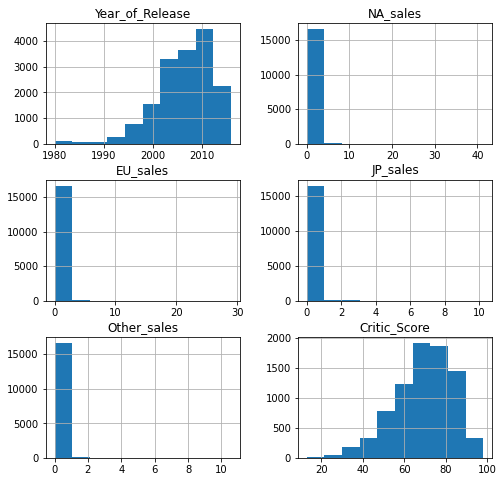

In [3]:
#построим гистограммы неотфильтрованных данных
%matplotlib inline
data.hist(figsize=(8, 8));

In [4]:
#определим в количество пропущенных данных в процентном соотношении
import numpy as np
print('Пропущенные данные (в процентном соотношении):')
print(round(data.isna().mean()*100))

Пропущенные данные (в процентном соотношении):
Name                0.0
Platform            0.0
Year_of_Release     2.0
Genre               0.0
NA_sales            0.0
EU_sales            0.0
JP_sales            0.0
Other_sales         0.0
Critic_Score       51.0
User_Score         40.0
Rating             40.0
dtype: float64


In [5]:
#проверим значения на уникалность 'Genre', 'Name', 'Platform', 'Rating'
data['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [6]:
data['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [7]:
data['Name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [8]:
data['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [9]:
#data['platform'].unique()


In [10]:
data['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [11]:
data.isna().sum() #перепроверим, в Name увидела пропуски

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### **Предварительные выводы:**
Набор данных состоит из строк и столбцов сответственно: `16715, 11`. 
Посмотрела структуру данных - сразу видно, что для дальнейшего комфортного анализа следует поменять типы данных у `'Critic_Score'`, `'User_Score'` и `'Year_of_Release'`.
*  Проверила на уникальность некоторые данные с целью нахождения потенциально возможых неявных дубликатов. Видно, что надо будет поработать со стольбцом `'Rating'`. 
*  Проверила количество пропусков в процентном соотношении. 
Обнаружила пропуски в следующих данных: `Critic_Score` - 51%, `User_Score` -    40%, `Rating` - 40% и `Year_of_Release` -  2%, `Name` -содержит 2 пропуска(их сразу удалим,Ю ибо минимальны, а на рассчеты повлиять могут). Надо будет проверить возможные причины таких пропусков, по возможности данные почистить.

Будем теперь исследовать данные на дубликаты, аномалии и т.д.

 

## **Шаг 2. Подготовьте данные**

1.  Замените названия столбцов (приведите к нижнему регистру);
2.  Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
3. Обработайте пропуски при необходимости:
  *  Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  *  Опишите причины, которые могли привести к пропускам;
  *  Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
  *  Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### 1. **Замените названия столбцов (приведите к нижнему регистру)**

In [12]:
#Приведем названия столбцов к нижнему регистру
data.columns=data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.  **Преобразуйте данные в нужные типы.** 
Опишите, в каких столбцах заменили тип данных и почему;

In [13]:
data['critic_score'] = np.floor(pd.to_numeric(data['critic_score'], errors='coerce')).astype('Int64')
data['user_score'] = np.floor(pd.to_numeric(data['user_score'], errors='coerce')).astype('Int64')
#data['user_score'].convert_objects(convert_numeric=True)
#astype(dtype, copy=True, errors='raise')[source]
#data['user_score'] = pd.array(data['user_score'], dtype=pd.Int64Dtype())
data['year_of_release'] = pd.array(data['year_of_release'], dtype=pd.Int64Dtype())
print('Для удобства дальнейшего анализа преобразовали данные в нужные типы:')
print('"Critic_Score" - в целочисленные; ')
print('"user_score" в тип float - так как мы видим, что в реальности это дробные числа;')
print('"year_of_release" - в int, опять же для более понятной визуализации и расчетов.')
print()
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
#data['year_of_release'] = data['year_of_release'].dt.year
#проверяем
print(data.dtypes)
display(data.head())

Для удобства дальнейшего анализа преобразовали данные в нужные типы:
"Critic_Score" - в целочисленные; 
"user_score" в тип float - так как мы видим, что в реальности это дробные числа;
"year_of_release" - в int, опять же для более понятной визуализации и расчетов.

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score           Int64
rating              object
dtype: object


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN


**Выводы:**

Для удобства дальнейшего анализа преобразовали данные в нужные типы:
* **"critic_score"** - в целочисленные; 
* **"user_score"** - в тип float, так как мы видим, что в реальности это дробные числа;
*  **"year_of_release"** - в int, опять же для более понятной визуализации и расчетов.

Также понизили регистр в названиях столбцов, опять же для ужобства дальнейшей работы с данными.

### 3. **Обработайте пропуски при необходимости:**
  *  Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  *  Опишите причины, которые могли привести к пропускам;
  *  Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
  *  Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Проверим пропущенные данные в **'name'** перед удалением. Видно , что во всей строке информации много потерянной - безболезненно можем удалить

In [14]:
#Проверим пропущенные данные перед удалением
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,<NA>,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,<NA>,NaN


In [15]:
#удаляем
data.dropna(subset = ['name'], inplace = True)
data['name'].isna().sum()
data['genre'].isna().sum()

0

**Выводы:**

Как видим пропуски в `'genre'` также удалились с `'name'` - так что это решение было верным, данные строки были малоинформативны для нашего дальнейшего анализа. Пропуски в данных столбцах могли возникнуть из-за того, что забыли указать имя и жанр, к какому относится видеоигра.

Разберемся с **year_of_release**. Посмортим на данные с пропусками, как можно их улучшить

In [16]:
data['year_of_release'].sort_values().unique()
data.loc[data['year_of_release'].isna()].head(10)
#data1 = data.loc[(data['year_of_release'].isna())]
#data1.loc[data1['rating']=='E10+']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92,8,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73,<NA>,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78,6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69,6,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80,6,T


In [17]:
#for i in (str(i) for i in range(1980,2017)):
#    data.loc[(data['year_of_release'].isna())&(data['name'].str.find(i)!=-1)]=int(i)
#data.loc[data['year_of_release'].isna()].head(5)
#data['platform'].unique()

In [18]:
# Количество пропусков уменьшилось с 269 до 252
data['year_of_release'].isna().sum()

269

In [19]:
# удаляем строки с пустыми значениями в столбцах
data.dropna(subset = ['year_of_release'], inplace = True)
data['year_of_release'].isna().sum()

0

**Вывод:**
Удалила пропущенные названия в 'year_of_release'.
Проверила, можно ли заменить некоторые года, вытащив их из названия:
отказалась от этой идеи, так как слишком маленькое количество данных отчищается (менее 20 шт), не имеет смысла на данный момент, не повлияет на дальнейшее исследование - двигаемся дальше.

Исследуем **'user_score'** и **critic_score**

В столбце **'user_score'** встречается аббревиатура `'tbd'`, что расшифровывается "To Be Determined" - "статус будет определен".

> **'tbd'** - Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

**'tbd'** - Заменим на Nan

In [20]:
#запишем функцию
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
#проверяем уникальные значения в столбце после применения функции
#data.loc[data['user_score'] =='tbd']
data['user_score'].sort_values().unique()
#data['user_score'].isna().sum()

<IntegerArray>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, <NA>]
Length: 11, dtype: Int64

Перейдем к **critic_score - 51%** пропусков. Рассмотрим данные этого столбца более детально. Что за пропуски и можно ли их заполнить.

в столбцах **critic_score** - это численные значения.
Рассчитаем медиану по показателям, т.к. пропуски могут повлиять на дальнейшую аналитику. 

Причиной пропусков в рейтинге может быть просто отсутствие оценок (неоцененные игры) или же игры были недавнего вышедшие и еще не получили свои оценки.

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

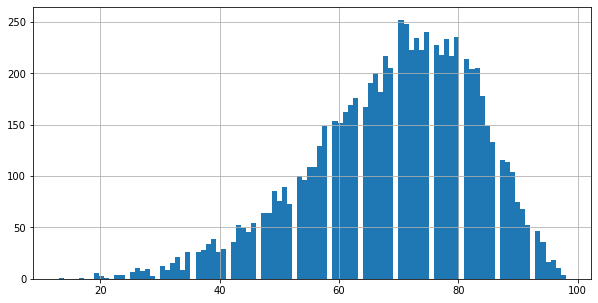

In [21]:
#Проверим пропущенные данные
data.loc[data['critic_score'].isna()].sort_values('year_of_release')
#data['critic_score'].isna().sum()
#data.loc[data['user_score'].isna()].sort_values('year_of_release')
data['critic_score'].hist(bins=100,  figsize=(10, 5)) #range=(1.3,36),

data_m=data['critic_score'].median
data['critic_score_f'] = data['critic_score'].fillna(71) #.replace('NA', 'tbd')
#data['critic_score_f'].unique()
data['critic_score'].describe()
#data['critic_score_f'].hist(bins=100,  figsize=(10, 5))


count    16444.000000
mean        70.026332
std          9.750209
min         13.000000
25%         71.000000
50%         71.000000
75%         71.000000
max         98.000000
Name: critic_score_f, dtype: float64

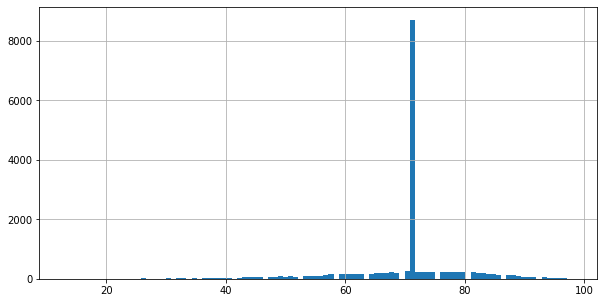

In [22]:
data['critic_score_f'].hist(bins=100,  figsize=(10, 5))
data['critic_score_f'].describe()

**Вывод**

При замене на медиану в `critic_score` возникает очень большой пик - выглядит , как аномалия. Считаю, что лучше оставить данные незаполненными. А то слишком сильное искажение будент - слишком много исскуственных значений.
Аналогичная ситукация  по `user_score` -оставляем как есть.

Давайте обратимся к значениям **'rating'**:

Значения (E) и (КА) - фактически одно и то же.
> Все (E) это базовый рейтинг. Игры с таким рейтингом имеют контент, который «в целом подходит для всех возрастов». Они могут содержать незначительные случаи мультипликационного насилия или комического вреда. До 1998 года этот рейтинг назывался Дети для взрослых (КА).

Можно обединить значения этих строк. Но пока не буду это делать, так как эти обозначения возможно в будущем могут пригодится для группировки по годам. Посмотрим.

In [23]:
#Присвоим пропущенным значениям в столбце 'rating' на значение 'unknown'
data['rating'] = data['rating'].replace(np.NaN, 'unknown')
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_f
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,76
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,unknown,71
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,82
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,80
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,unknown,71
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,unknown,71
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8,E,89
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6,E,58
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8,E,87
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,unknown,71


In [24]:
#Проверим наличие пропусков
print(round(data.isna().mean()*100))

name                0.0
platform            0.0
year_of_release     0.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.0
user_score         55.0
rating              0.0
critic_score_f      0.0
dtype: float64


**Выводы:** 
* Удалила пропуски в `'genre'` и `'name'` - строки были малоинформативны для нашего дальнейшего анализа. 
> Пропуски в данных столбцах могли возникнуть из-за того, что забыли указать имя и жанр, к какому относится видеоигра.
* Значения (E) и (КА) в **'rating'** - фактически одно и то же.
> Все (E) это базовый рейтинг. Игры с таким рейтингом имеют контент, который «в целом подходит для всех возрастов». Они могут содержать незначительные случаи мультипликационного насилия или комического вреда. До 1998 года этот рейтинг назывался Дети для взрослых (КА).

Можно обединить значения этих строк. Но пока решила это не делать, так как эти обозначения возможно в будущем могут пригодится для группировки по годам. Посмотрим.

* Избавились от возможных пропусков, оставили данные только в `critic_score` и `user_score`. Проверим их позже - у них вообще должна наблюдаться явная зависимость.
Причиной пропусков в рейтинге может быть просто отсутствие оценок (неоцененные игры) или же игры были недавнего вышедшие и еще не получили свои оценки.
* В столбце **'user_score'** встречается аббревиатура `'tbd'`, что расшифровывается "To Be Determined" - "статус будет определен".
> **'tbd'** - Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.
**'tbd'** - Заменила данные на Nan

*  Cуммарные продажи во всех регионах посчитаю позже в работе во время анализа.


## **Шаг 3. Проведите исследовательский анализ данных**
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
7. Соотнесите выводы с продажами игр на других платформах.
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### **1. Посмотрим, сколько игр выпускалось в разные годы.** 
Определим важны ли данные за все периоды?

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

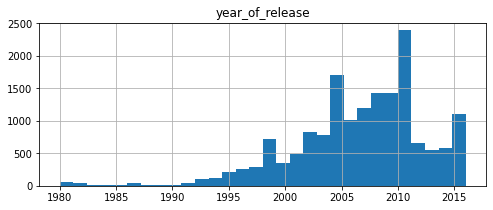

In [25]:
data.hist('year_of_release', bins=30, grid=True, figsize = (8,3))  #range=(0,30),
data['year_of_release'].describe()

In [26]:
count_games = data.pivot_table(index=['year_of_release'], values= ['name', 'platform'], aggfunc='count')
count_games = count_games.reset_index()
display(count_games.sort_values(by='name', ascending=False).head(15))
#display(count_games.value_counts())
count_games.describe()

,year_of_release,name,platform
28,2008,1427,1427
29,2009,1426,1426
30,2010,1255,1255
27,2007,1197,1197
31,2011,1136,1136
26,2006,1006,1006
25,2005,939,939
22,2002,829,829
23,2003,775,775
24,2004,762,762


,year_of_release,name,platform
count,37.000000,37.000000,37.000000
mean,1998.000000,444.432432,444.432432
std,10.824355,451.604334,451.604334
min,1980.000000,9.000000,9.000000
25%,1989.000000,36.000000,36.000000
50%,1998.000000,338.000000,338.000000
75%,2007.000000,762.000000,762.000000
max,2016.000000,1427.000000,1427.000000


<AxesSubplot:xlabel='year_of_release'>

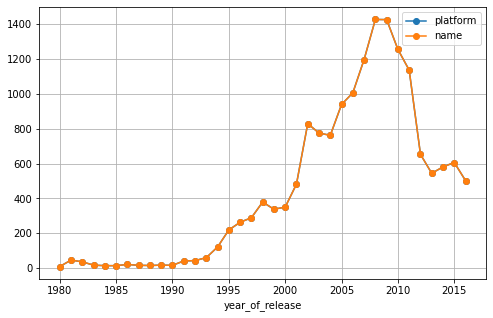

In [27]:
#display(count_games.value_counts())
count_games.plot(x='year_of_release', y=['platform','name'], style='o-', figsize=(8, 5), sharex=False, grid=True)

**Выводы**
*  Наибольная активность наблюдается в 2008 и 2009 гг: . Можно было бы взять их за основную выборку при дальнейшем анализе. 
> Но на мой взгляд рынок игр очень динамичный, поэтому информация за 2008 и 2009 года может быть уже устаревшей. 

*  Поэтому все же для выборки пока предлагаю **взять 2015 и 2016 года** или с 2010-2016  - они должны более точно отражасть современные тенденции и динамику развития рынка. Исследуем данные далее и уже точно определисмя.
* Интересное наблюдение - количество выложенных игр при подсчете по платформам и именам полностью совпадают.Что показывает - прямую зависимость одного от другого.


### **2.  Посмотрите, как менялись продажи по платформам.** 
 * Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
 *  За какой характерный срок появляются новые и исчезают старые платформы?
 

In [28]:
platform_sales = data.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
platform_sales = platform_sales.reset_index()
#display(platform_sales.sort_values(by='na_sales', ascending=False))
#display(count_games.value_counts())
#посчитаем суммарные продажи по всем регионам
platform_sales['sum_sales'] =  platform_sales[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(platform_sales.sort_values(by='sum_sales', ascending=False).head(20))
platform_sales.describe()

,platform,eu_sales,jp_sales,na_sales,other_sales,sum_sales
16,PS2,332.63,137.54,572.92,190.47,1233.56
28,X360,268.32,12.30,595.74,84.88,961.24
17,PS3,327.21,79.41,390.13,134.59,931.34
26,Wii,258.32,68.28,486.87,77.71,891.18
4,DS,188.41,175.02,380.31,59.04,802.78
15,PS,212.39,139.78,334.72,40.69,727.58
18,PS4,141.09,15.96,108.74,48.35,314.14
6,GBA,74.59,46.56,184.12,7.61,312.88
19,PSP,65.62,75.88,107.27,40.76,289.53
2,3DS,61.27,100.62,82.65,13.27,257.81


,eu_sales,jp_sales,na_sales,other_sales,sum_sales
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,77.409032,41.633548,140.045806,25.246129,284.334516
std,102.926666,51.221056,174.491435,44.058869,343.954144
min,0.000000,0.000000,0.000000,0.000000,0.030000
25%,1.115000,0.915000,3.215000,0.170000,22.150000
50%,38.320000,15.960000,93.120000,5.950000,200.040000
75%,107.480000,77.645000,160.485000,31.285000,301.205000
max,332.630000,175.020000,595.740000,190.470000,1233.560000


In [29]:
platform_sales1 = data.pivot_table(index=['platform', 'year_of_release'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
#2 способ
#data.groupby(['platform', 'year_of_release'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()
platform_sales1['sum_sales'] =  platform_sales1[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
#platform_sales1 = platform_sales1.reset_index()
platform_sales1.sort_values(by='sum_sales', ascending=False).head(11)


eu_sales  jp_sales  na_sales  other_sales  sum_sales
platform year_of_release                                                      
PS2      2004                56.01     19.17     96.78        39.85     211.81
Wii      2009                58.31     16.57    114.55        17.54     206.97
PS2      2002                65.27     21.85     96.54        21.72     205.38
         2003                61.20     18.88     83.54        20.69     184.31
Wii      2008                46.52     12.69     97.12        14.99     171.32
X360     2010                46.31      2.11    107.38        14.23     170.03
PS       1998                48.74     28.48     83.22         9.05     169.49
PS2      2001                52.37     17.79     79.49        16.78     166.43
         2005                40.86     15.05     85.60        19.15     160.66
PS3      2011                56.24     14.10     64.88        21.56     156.78
Wii      2007                43.96     12.12     83.14        13.55     152.77

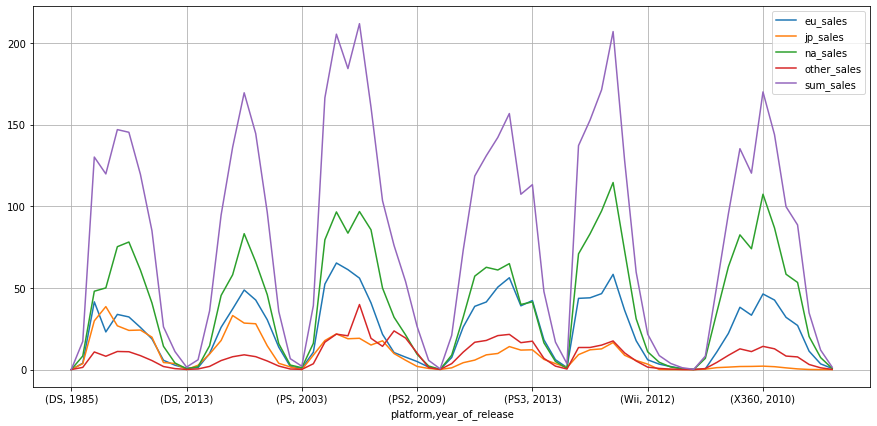

In [30]:
# Постороим распределение по годам платформ с наибольшими суммарными продажами 
platform_sales1.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"]').plot( grid=True, figsize=(15, 7)) #plot(grid=True, figsize=(15, 8))
#data_pr_room.plot(x='rooms', y='mean_price_mln', kind='scatter', alpha=0.3) 
plt.show()

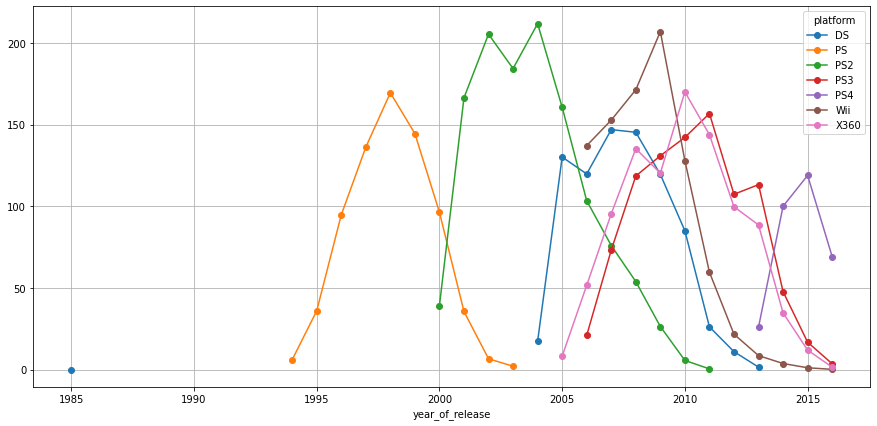

In [31]:
platform_sales1.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4"]')\
                      .pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum')\
                      .plot(style='o-', grid=True, figsize=(15, 7))
plt.show()

**Выводы:**

Проанализировала данные по платформам относительно продаж. 

По итогу было выявлено, что за все время самыми прибильными оказались `PS2 ,X360,PS3, Wii, DS, PS`	- они идут с явным отрывом от остальных. 
Вот по ним и проведем анализ. Если мы говорим о всем периоде данных.

**Выводы:**
Проанализировала данные по платформам относительно продаж. 
* По итогу было выявлено, что за все время самыми прибильными оказались `PS2 ,X360,PS3, Wii, DS, PS`	- они идут с явным отрывом от остальных. 
* По этим наиболее успешным по продажам платформ провела анализ по годам. Из графиков мы видим, что:
* платформы со временем утрачивают свою популярность - **время жизни в среднем 10 лет**, **пик популярности** приходится, как правило **через 5 лет** после появления.
* некоторые успешные прлатформы к 2015-2016 гг совсем прекратили свои продажи. Остались только **`X360`, `PS3`, `Wii`**, причем у последней совсем уже в 2015 году низкие продажи. Зато в этот период появились и активно продавали платформы - **"PS4", "XOne", "3DS"** (в информации ниже).
*  **`PS2`, `X360`** самые долгоживущие платформы - 12 лет, период их "жизни" с 2010 по 2016 гг. 
> Платформу **`PS2`** можно было бы использовать в анализе, если будет поставлена задача исследовать самую успешную платформу за весь период времени жизни платформы. Но перед нами стоит другая задача.
* Исследование еще раз показало, что гипотеза о необходимости исследования свежей выборки подтверждается. Поэтому будем исследовать **период с 2015 по 2016 гг.**
* Но параллельно все же проверим период последние 5 лет: **с 2011 по 2016 гг.** - все же не хочется терять результаты унаиболее успешных платформ


### **3. Возьмите данные за соответствующий актуальный период.** 

Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Проверим периоды 2015-2016 гг. - первый вариант выборки.

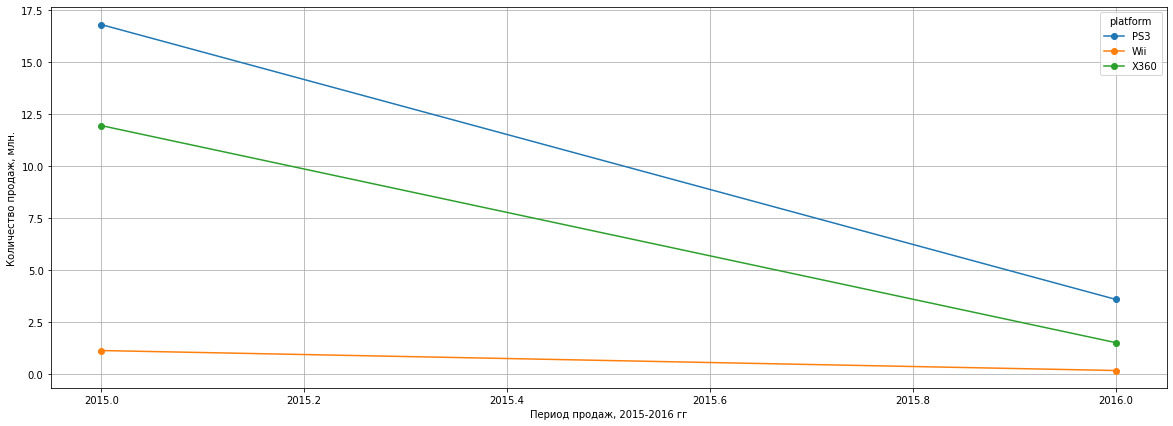

In [32]:
platform_sales1.query('platform == [ "X360", "PS3", "Wii"] and year_of_release == [2015, 2016]')\
                      .pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum')\
                      .plot(style='o-', grid=True, figsize=(20, 7))
plt.xlabel('Период продаж, 2015-2016 гг')
plt.ylabel('Количество продаж, млн.')
plt.show()

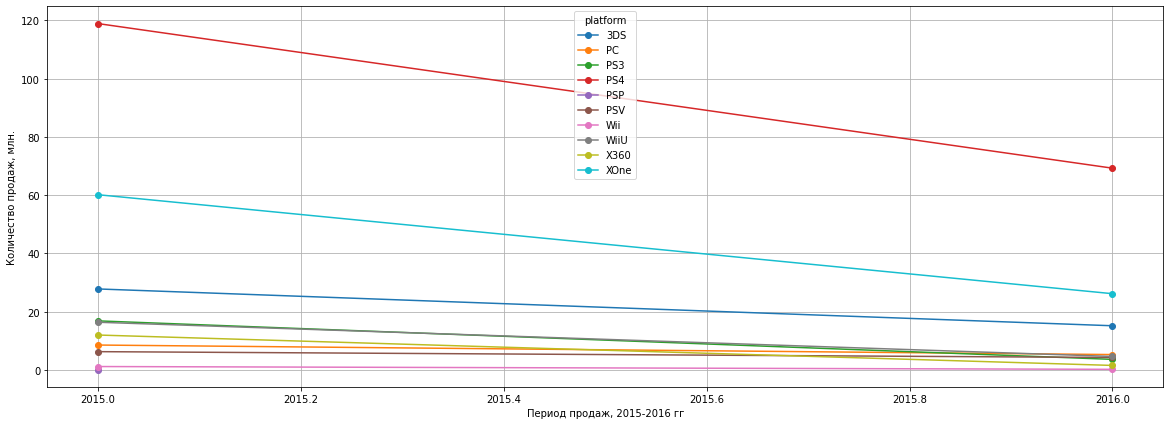

In [33]:
platform_sales1.query('year_of_release == [2015, 2016]')\
                      .pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum')\
                      .plot(style='o-', grid=True, figsize=(20, 7))

plt.xlabel('Период продаж, 2015-2016 гг')
plt.ylabel('Количество продаж, млн.')
plt.show()

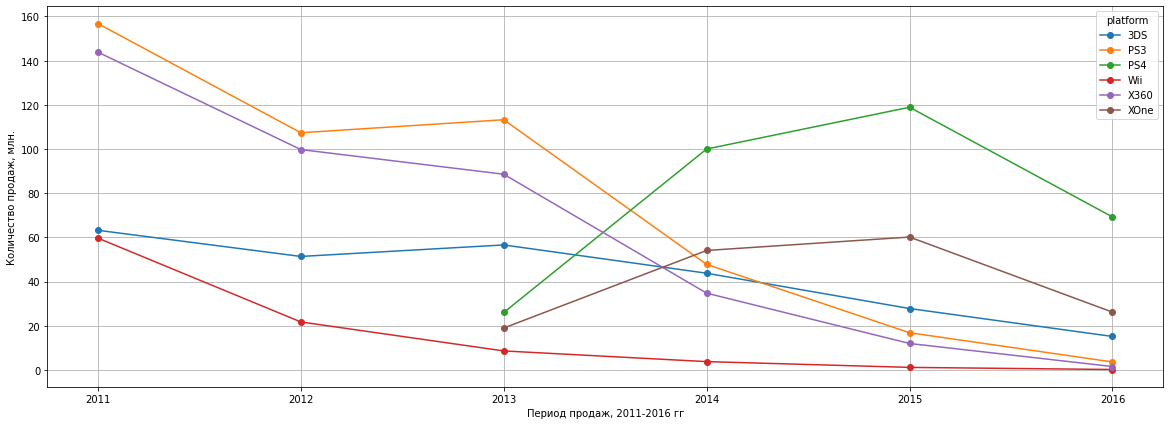

In [34]:
platform_sales1.query('platform == [ "X360", "PS3", "Wii", "PS4", "XOne", "3DS"] and year_of_release == [2011,2012,2013,2014,2015,2016]')\
                      .pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum')\
                      .plot(style='o-', grid=True, figsize=(20, 7))
plt.xlabel('Период продаж, 2011-2016 гг')
plt.ylabel('Количество продаж, млн.')
plt.show()

**Вывод:**

* Мы видим, что оставшиеся успешные платформы **`X360`, `PS3`, , `Wii`** в **2015-2016 гг** имеют явную тенденцию к снижению продаж. А у последней уже с 2015 года показатели продаж уже стремились к нулю. В дальнейших исследованиях не вижу смысла использовать ее данные в этой выборке.
*  На всякий случай, сделала срез по всем платформам в 2015-2016 гг. Получила интересные результаты:
> Несмотря на то, что тенденция к спаду продаж сохраняется у всех платформ, самые успешные платформы за весь цикл их жизни в 2015 году не в лидерах продаж. 

 > Лидеры продаж за этот период: **`PS4`**, **`3DS`**, **`XOne`** (очень странно, что последняя лидирует - у нее вообще общие продажи низкие по сравнению сдругими). Будем это держать в голове. К тому же, эти платформы имеют срок жизни всего лишь пока 3 года (судя по всему в итоге 4 года).

В связи с получившимся результатом, всеже имеет смысл взять для исследования период **2011-2016 гг**, чтобы не терять данные топовых платформ из **ТОП-6:`X360`, `PS3`**, плюс исследовать хорошо продаваемые платформы в 2015-2016 года: **`PS4`,`XOne`,`3DS`**.

### **4. Какие платформы лидируют по продажам, растут или падают?** 
**Выберите несколько потенциально прибыльных платформ.**

В связи с получившимся результатом, думаю имеет смысл для дальнейших исследований взять:
*  платформы из топовых продаж **`X360`, `PS3`** (платформы из выборки **топ 6** за весь период ), как дополнительно для сравнения при необходимости. 
* и хорошо продаваемые платформы в периоде **2011-2016 гг - `PS4`,`XOne`, `3DS`**.

Напоминаю, что для исследований берем выборку по годам 2011 -2016 гг., и как дополнительную - 2015-2016гг
Приступим к исследованиям.

In [35]:
# Начинаем работу с выгрузкой 2011-2016 гг.
# Для начала добавим в основной наш датасет колонку с суммированными продажами
# Затем ограничиваем выборку
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data5 = data.loc[data['year_of_release'] >= 2011]
data5.sort_values(by='sum_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_f,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,97,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,97,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3,M,88,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,<NA>,unknown,71,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,<NA>,unknown,71,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5,M,83,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4,M,83,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3,M,88,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85,8,E,85,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,97,12.62


In [36]:
platform_sales5 = platform_sales1.query('year_of_release == [2011,2012,2013,2014,2015,2016]')
#platform_sales16 = platform_sales1.query("2015 <= year_of_release <= 2016")
platform_sales5

eu_sales  jp_sales  na_sales  other_sales  sum_sales
platform year_of_release                                                      
3DS      2011                18.63     12.83     27.34         4.40      63.20
         2012                11.68     19.98     17.11         2.59      51.36
         2013                14.84     23.57     15.56         2.60      56.57
         2014                 8.73     20.69     12.33         2.01      43.76
         2015                 5.06     15.52      6.17         1.03      27.78
         2016                 2.33      8.03      4.14         0.64      15.14
DS       2011                 5.71      4.32     14.27         1.88      26.18
         2012                 2.68      3.72      4.02         0.59      11.01
         2013                 0.85      0.00      0.57         0.12       1.54
PC       2011                18.94      0.00     10.76         5.33      35.03
         2012                12.40      0.00      8.01         2.81      23.22
         2013                 7.39      0.00      3.88         1.11      12.38
         2014                 8.87      0.00      3.51         0.90      13.28
         2015                 5.57      0.00      2.36         0.59       8.52
         2016                 3.53      0.00      1.36         0.36       5.25
PS2      2011                 0.13      0.09      0.13         0.10       0.45
PS3      2011                56.24     14.10     64.88        21.56     156.78
         2012                39.05     11.94     39.88        16.49     107.36
         2013                42.27     12.13     41.45        17.40     113.25
         2014                18.24      6.25     16.39         6.88      47.76
         2015                 6.04      3.67      4.99         2.12      16.82
         2016                 1.26      1.30      0.67         0.37       3.60
PS4      2013                11.05      0.94     10.13         3.87      25.99
         2014                46.50      2.97     34.75        15.78     100.00
         2015                51.76      6.31     42.37        18.46     118.90
         2016                31.78      5.74     21.49        10.24      69.25
PSP      2011                 1.35     13.57      2.06         0.84      17.82
         2012                 0.25      7.18      0.13         0.13       7.69
         2013                 0.17      2.93      0.00         0.04       3.14
         2014                 0.00      0.24      0.00         0.00       0.24
         2015                 0.00      0.12      0.00         0.00       0.12
PSV      2011                 1.71      0.80      1.49         0.63       4.63
         2012                 5.26      2.45      5.94         2.54      16.19
         2013                 2.57      4.05      2.52         1.45      10.59
         2014                 2.45      6.13      1.98         1.34      11.90
         2015                 0.69      4.85      0.39         0.32       6.25
         2016                 0.39      3.56      0.15         0.15       4.25
Wii      2011                17.68      5.58     31.11         5.28      59.65
         2012                 5.99      3.34     10.89         1.49      21.71
         2013                 3.34      0.05      4.48         0.72       8.59
         2014                 1.86      0.00      1.59         0.30       3.75
         2015                 0.62      0.00      0.43         0.09       1.14
         2016                 0.11      0.00      0.06         0.01       0.18
WiiU     2012                 5.28      2.13      8.89         1.26      17.56
         2013                 6.70      3.57      9.85         1.53      21.65
         2014                 6.66      3.19     10.50         1.68      22.03
         2015                 5.01      3.45      6.76         1.13      16.35
         2016                 1.48      0.67      2.10         0.35       4.60
X360     2011                42.58      1.78     86.75        12.73     143.

In [37]:
# Выгрузка 2015-2016 гг.
data16 = data.loc[(data['year_of_release'] <= 2016)&(data['year_of_release'] >= 2015)]
data16.sort_values(by='sum_sales', ascending=False).head()
platform_sales16 = platform_sales1.query('year_of_release == [2015,2016]')
#platform_sales16 = platform_sales1.query("2015 <= year_of_release <= 2016")
platform_sales16

eu_sales  jp_sales  na_sales  other_sales  sum_sales
platform year_of_release                                                      
3DS      2015                 5.06     15.52      6.17         1.03      27.78
         2016                 2.33      8.03      4.14         0.64      15.14
PC       2015                 5.57      0.00      2.36         0.59       8.52
         2016                 3.53      0.00      1.36         0.36       5.25
PS3      2015                 6.04      3.67      4.99         2.12      16.82
         2016                 1.26      1.30      0.67         0.37       3.60
PS4      2015                51.76      6.31     42.37        18.46     118.90
         2016                31.78      5.74     21.49        10.24      69.25
PSP      2015                 0.00      0.12      0.00         0.00       0.12
PSV      2015                 0.69      4.85      0.39         0.32       6.25
         2016                 0.39      3.56      0.15         0.15       4.25
Wii      2015                 0.62      0.00      0.43         0.09       1.14
         2016                 0.11      0.00      0.06         0.01       0.18
WiiU     2015                 5.01      3.45      6.76         1.13      16.35
         2016                 1.48      0.67      2.10         0.35       4.60
X360     2015                 3.50      0.00      7.36         1.10      11.96
         2016                 0.71      0.00      0.69         0.12       1.52
XOne     2015                18.47      0.17     36.03         5.47      60.14
         2016                 9.63      0.01     14.27         2.24      26.15

In [38]:
data16.query('platform == [ "X360", "PS3", "PS4", "XOne", "3DS"]')\
                       .groupby('platform')['sum_sales'].describe()\
                       .sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
XOne,167.0,0.516707,0.965940,0.01,0.035,0.13,0.5550,7.39
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.4200,14.63
X360,48.0,0.280833,0.381207,0.01,0.040,0.11,0.3525,1.70
3DS,132.0,0.325152,0.798620,0.01,0.030,0.09,0.2325,7.14
PS3,111.0,0.183964,0.342696,0.01,0.020,0.06,0.1600,2.70


In [39]:
data5.query('platform == [ "X360", "PS3", "PS4", "XOne", "3DS"]')\
                       .groupby('platform')['sum_sales'].describe()\
                       .sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,498.0,0.763815,1.637090,0.01,0.09,0.27,0.7800,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39
PS3,708.0,0.629336,1.451388,0.01,0.07,0.21,0.6400,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60


**Выводы:**

Проверили данные по выборкам **2011-2016гг** (и **2015-2016** гг дополнительно):
* Медианное и среднее значение по продажам у всех платформ значительно отличается, это говорит о том, что у каждой из платформ были яркие выбросы по продажам, но не системные.

* **"X360"** и **"PS3"** в лидерах по доходу: максимальные продажи ** 16,3 млн и 21 млн**, медианные - **0.27 млн и 0.21 млн** соответственно.
* Если смотреть платформы **"PS4"** и **"XOne"** в лидерах по доходу: максимальные продажи ** 14,6 млн и 7.4 млн**, медианные - **0.20 млн и 0.22 млн** соответственно.
* У платформ **`X360, PS3 и 3DS`** - в выбранном периоде наблюдается тенеденция к снижению продаж, только в **2013** году был небольшой подъем у **`PS3 и 3DS`**, возможно в это время было выпущено какое-то обновление либо проведена другая акция, котроая вызвала небольшой всплеск популярности. 
> Но в любом случае - видно, что наблюдается тенденция к окончанию "времени жизни" данных платформ (как уже упоминала ранее их время жихни 10-12 лет,здесь явно видно, что это их 2-я половина "жизни")
* У платформ **`PS4, XOne`** ситуация совсем другая - из таблиц и графика видно, что они были выпущены в **2013** году, и до **2015** года наблюдался их стремительный рост, но после **2015** года популярность пошла на спад.
> Интересен тот факт, что время жизни данных платформ намног ниже и судя по тенденции не дольше 4х лет. 
* "PS3", "X360" - имеет смысл рассматривать хотя бы за последние 5 лет (так как в этот период видно половину их цикла жизни) - 2011- 2016. это видно из разницы показателей по разным выборкам (2011-2016 и 2015-2016гг)

В принципе имеет смысл исследовать, как пары - **"PS4", "XOne"** и **"X360"** и **"PS3"** так как они соизмеримы по времени жизни. 
Именно эти платформы в этом периоде будем рассматривать, как **перспективные**.

**А для более полного анализа лучше всего взять выборку данных по периоду 2011-2015гг.** уже не отвлекаясь на другие периоды

### **5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.** 

Опишите результат.

(0.0, 15.0)

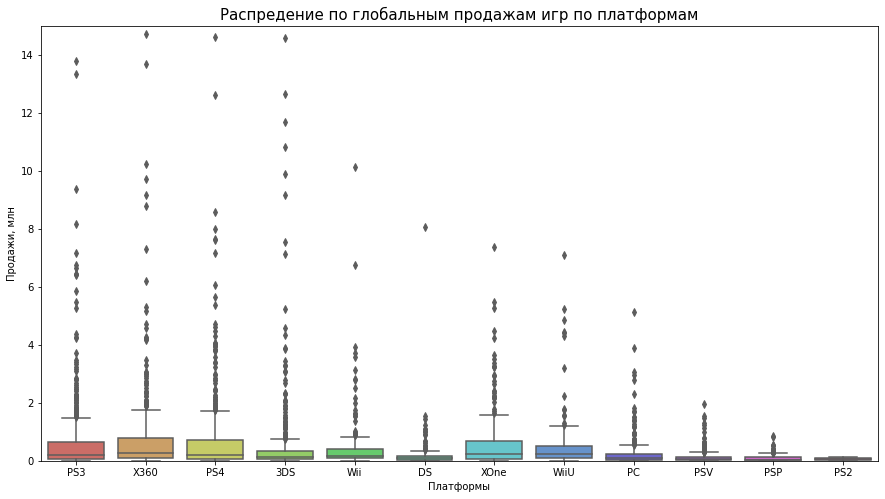

In [40]:
plt.figure(figsize=(15,8))
plt.title('Распредение по глобальным продажам игр по платформам', fontsize=15)
sns.boxplot(y=data5['sum_sales'], x=data5['platform'], palette='hls') #
plt.ylabel('Продажи, млн')
plt.xlabel('Платформы');
plt.ylim(0, 15)

Из диаграммы размаха видно, что у всех платформ есть редкие выбросы, как например у `PS4,  X360` в 15 млн - это не системные продажи. 
Имеет смысл ограничить график до 1,75 млн (по верхней границе продаж по усам  `X360`). Затем  более детально исследовать результаты.

(0.0, 1.75)

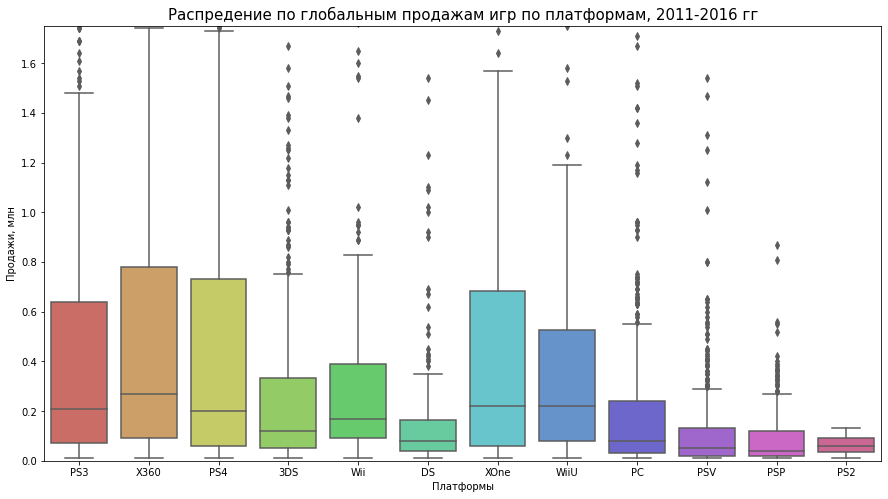

In [41]:
data5 = data.loc[data['year_of_release'] >= 2011]
plt.figure(figsize=(15,8))
plt.title('Распредение по глобальным продажам игр по платформам, 2011-2016 гг', fontsize=15)
sns.boxplot(y=data5['sum_sales'], x=data5['platform'], palette='hls') #
plt.ylabel('Продажи, млн')
plt.xlabel('Платформы');
plt.ylim(0, 1.75)


(0.0, 1.3)

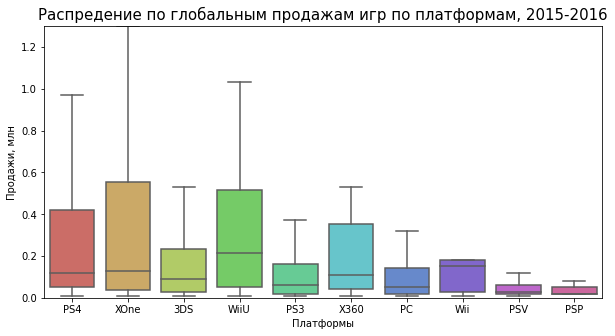

In [43]:
plt.figure(figsize=(10,5))
plt.title('Распредение по глобальным продажам игр по платформам, 2015-2016', fontsize=15)
sns.boxplot(y=data16['sum_sales'], x=data16['platform'], palette='hls', showfliers=False)
plt.ylabel('Продажи, млн')
plt.xlabel('Платформы');
plt.ylim(0, 1.3)


**Выводы:**

Диаграмма размаха показала, что что у всех платформ есть редкие выбросы, как например у `PS4,  X360` в 15 млн - это не системные продажи. 
Ограничила график до 1,75 млн (по верхней границе продаж по усам  `X360`).

При рассмотрении периода в последние 5 лет (2011-2016 гг) - видно, что:
* `"PS3", "X360" и "XOne"` - имеют лучшие результаты по 2 квартилю, выше 0.2 млн. 
>Вообще "X360" (медиана 0.27 млн) - лучше всего себя ведет. Один из самых успешных проектов за этот период на первый взгляд.
*  Также за этот период хорошо себя показывает ведет себя платформа `PS4`- по усам максимальный пик - 1,75 млн.(ранее мы уже видели , что ее время жизни как раз попадает в этот период).
*  По остальным платформам - их доход по медиане не превышает 0.2 млн.
* Больше всего несистемных продаж наблюдается именно в `PS4`и `X360` - вероятно там выходили какие-то новинки или обновления, котрые хорошо продавались.
* **таким образом из диаграммы размаха также видно, что лучшие продажи наблюдается как раз у выбранных нами платформ: `PS4,  X360`, `PS4`и `XOne`.**


### **6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.** 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для решения этой задачи выбирем платформу с лучшими показателями (за период 2011-2016гг) - **`X360`**

In [51]:
import warnings
warnings.filterwarnings("ignore")
data5['user_score'] = data5['user_score'].astype(float)
data5['critic_score'] = data5['critic_score'].astype(float)
data_X360=data5.loc[data5['platform']=='X360']
data_cs_X360 = data5.loc[data5['platform']=='X360'].pivot_table(index=['critic_score', 'user_score'], values ='sum_sales', aggfunc=['mean','median', 'count'])
data_cs_X360.columns = ['mean_sales_mln','median_sales_mln', 'count_sales_mln']
data_cs_X360 = data_cs_X360.reset_index()
data_cs_X360

,critic_score,user_score,mean_sales_mln,median_sales_mln,count_sales_mln
0,19.0,1.0,0.06,0.06,1
1,21.0,5.0,0.12,0.12,1
2,26.0,2.0,0.13,0.13,1
3,32.0,3.0,0.08,0.08,1
4,32.0,4.0,0.62,0.62,1
...,...,...,...,...,...
159,93.0,8.0,1.94,1.94,1
160,94.0,8.0,4.72,4.72,1
161,95.0,8.0,2.08,2.08,1
162,96.0,8.0,8.79,8.79,1


Коэффициент кореляции Пирсона равен 0.39


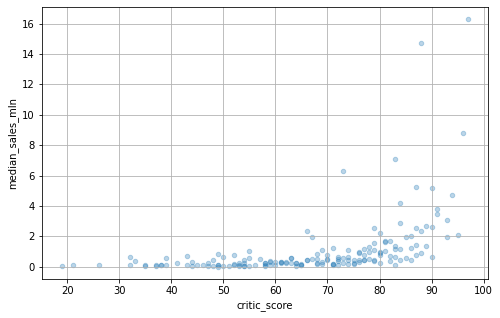

Коэффициент кореляции Пирсона равен 0.03


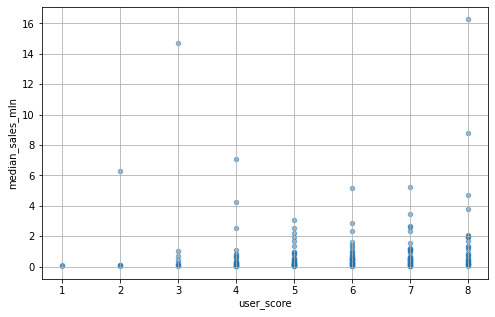

In [45]:
print(f'Коэффициент кореляции Пирсона равен {format((data_X360["critic_score"].corr(data_X360["sum_sales"])), ".2f")}')
data_cs_X360.plot(x='critic_score', y='median_sales_mln', kind='scatter', alpha=0.3, grid=True, figsize=(8,5))
plt.show()
print(f'Коэффициент кореляции Пирсона равен {format((data_X360["user_score"].corr(data_X360["sum_sales"])), ".2f")}')
data_cs_X360.plot(x='user_score', y='median_sales_mln', kind='scatter', alpha=0.5, grid=True, figsize=(8,5))
plt.show()

**Вывод:**

Корреляция Пирсона выявила:
* среднюю прямую зависимость продаж от оценок критиков - 0.39;
* практически отсутствеи зависимости уровня продаж от отзывов пользователей 0.03.

Графики подтверждают эти выводы.

### **7. Соотнесите выводы с продажами игр на других платформах.**

Посмотрим наиболее успешную платформу, не попавшую в нашу выборку внашем временном периоде и проанализируем данные.
> **WiiU** - как раз подходит, и по  медианным показателям и по суммированным продажам платформа показывает себя хорошо.

(0.0, 1.75)

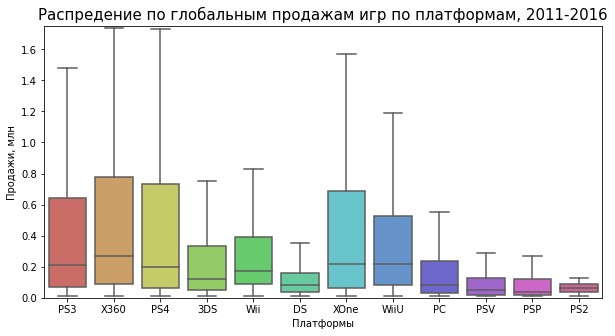

In [48]:
plt.figure(figsize=(10,5))
plt.title('Распредение по глобальным продажам игр по платформам, 2011-2016', fontsize=15)
sns.boxplot(y=data5['sum_sales'], x=data5['platform'], palette='hls', showfliers=False)
plt.ylabel('Продажи, млн')
plt.xlabel('Платформы');
plt.ylim(0, 1.75)

In [47]:
data5.groupby('platform')['sum_sales'].describe()\
                       .sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,498.0,0.763815,1.637090,0.01,0.0900,0.27,0.7800,16.27
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.22,0.6850,7.39
PS3,708.0,0.629336,1.451388,0.01,0.0700,0.21,0.6400,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
Wii,197.0,0.482335,1.059069,0.01,0.0900,0.17,0.3900,10.12
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.12,0.3325,14.60
DS,184.0,0.210489,0.636579,0.01,0.0375,0.08,0.1625,8.06
PC,389.0,0.251105,0.505710,0.01,0.0300,0.08,0.2400,5.14


In [49]:
platform_sales1.query('platform == [ "WiiU"] and year_of_release == [2011,2012,2013,2014,2015,2016]')

eu_sales  jp_sales  na_sales  other_sales  sum_sales
platform year_of_release                                                      
WiiU     2012                 5.28      2.13      8.89         1.26      17.56
         2013                 6.70      3.57      9.85         1.53      21.65
         2014                 6.66      3.19     10.50         1.68      22.03
         2015                 5.01      3.45      6.76         1.13      16.35
         2016                 1.48      0.67      2.10         0.35       4.60

In [54]:
data_WiiU=data5.loc[data5['platform']=='WiiU']
data_cs_WiiU = data5.loc[data5['platform']=='WiiU'].pivot_table(index=['critic_score', 'user_score'], values ='sum_sales', aggfunc=['mean','median', 'count'])
data_cs_WiiU.columns = ['mean_sales_mln','median_sales_mln', 'count_sales_mln']
data_cs_WiiU = data_cs_WiiU.reset_index()
data_cs_WiiU

,critic_score,user_score,mean_sales_mln,median_sales_mln,count_sales_mln
0,24.0,3.0,0.13,0.13,1
1,31.0,2.0,0.35,0.35,1
2,32.0,3.0,0.31,0.31,1
3,40.0,5.0,0.02,0.02,1
4,42.0,5.0,0.08,0.08,1
...,...,...,...,...,...
61,88.0,9.0,7.09,7.09,1
62,89.0,6.0,0.58,0.58,1
63,91.0,8.0,0.76,0.76,1
64,92.0,8.0,0.66,0.66,1


Коэффициент кореляции Пирсона равен 0.35


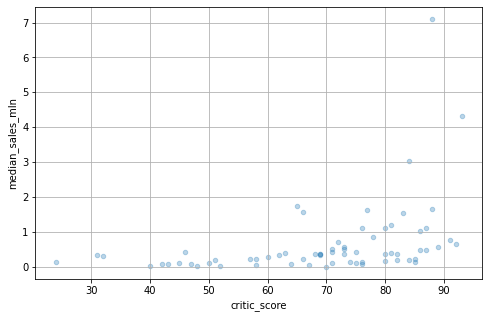

Коэффициент кореляции Пирсона равен 0.40


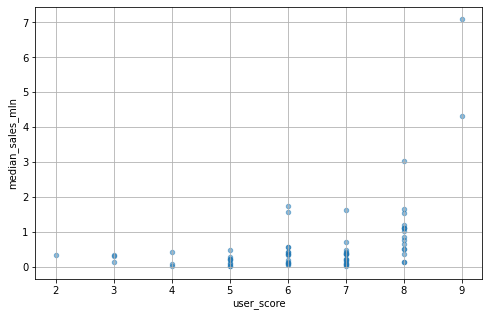

In [55]:
print(f'Коэффициент кореляции Пирсона равен {format((data_WiiU["critic_score"].corr(data_WiiU["sum_sales"])), ".2f")}')
data_cs_WiiU.plot(x='critic_score', y='median_sales_mln', kind='scatter', alpha=0.3, grid=True, figsize=(8,5))
plt.show()
print(f'Коэффициент кореляции Пирсона равен {format((data_WiiU["user_score"].corr(data_WiiU["sum_sales"])), ".2f")}')
data_cs_WiiU.plot(x='user_score', y='median_sales_mln', kind='scatter', alpha=0.5, grid=True, figsize=(8,5))
plt.show()

**Вывод:**

Для сравнения выбрала наиболее успешную платформу, не попавшую в нашу выборку внашем временном периоде и проанализируем данные.
> **WiiU** - как раз подходит, и по  медианным показателям и по суммированным продажам платформа показывает себя хорошо.

Корреляция Пирсона выявила:
* среднюю прямую зависимость продаж от оценок критиков - 0.35;
* И что интересно, довольно сильную прямую зависимость уровня продаж от отзывов пользователей 0.40. 
>В этом наблюдается значительное различие с результатами от платформы X360. Можно сделать предположение, что в данном случае отсутствие зависимости от отзывов пользователей может быть одной из причин, более успешных продаж у X360 (но это надо проверять. Пока наша задача в другом).


### **8. Посмотрите на общее распределение игр по жанрам.** 

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [79]:
data_genre5=data5.pivot_table(index='genre', values='sum_sales', aggfunc=['sum','mean', 'median','count'])
data_genre5.columns = ['sum_sales_mln','mean_sales_mln','median_sales_mln', 'count_sales_mln']
data_genre5 = data_genre5.reset_index()
data_genre5.sort_values(by='median_sales_mln', ascending=False)

,genre,sum_sales_mln,mean_sales_mln,median_sales_mln,count_sales_mln
8,Shooter,402.91,1.224650,0.410,329
10,Sports,237.15,0.609640,0.200,389
4,Platform,88.68,0.726885,0.185,122
2,Fighting,66.90,0.420755,0.180,159
6,Racing,88.31,0.490611,0.160,180
7,Role-Playing,245.63,0.528237,0.150,465
0,Action,557.80,0.439559,0.130,1269
3,Misc,139.42,0.371787,0.130,375
9,Simulation,50.26,0.369559,0.110,136
11,Strategy,22.16,0.189402,0.080,117


<AxesSubplot:ylabel='genre'>

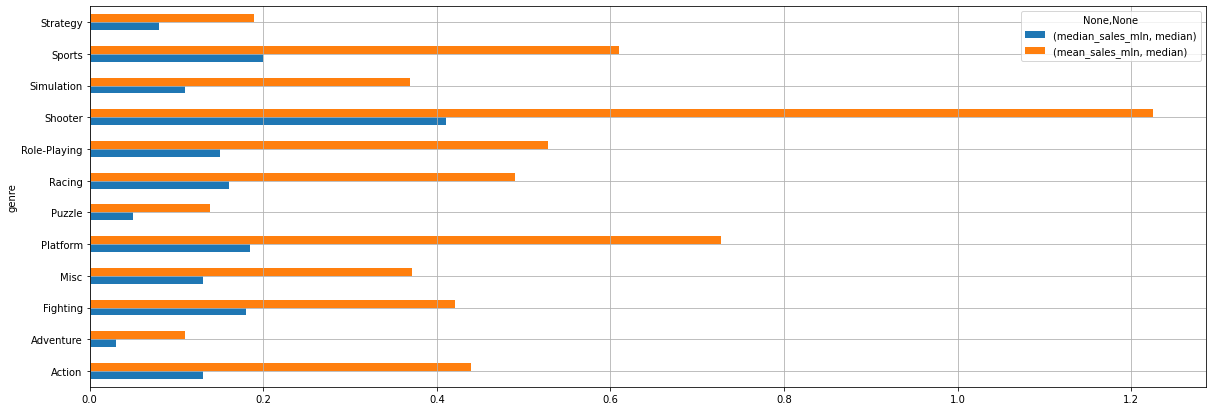

In [151]:
data_genre5.groupby(['genre'])['median_sales_mln', 'mean_sales_mln']\
           .agg(['median'])\
           .plot(style='o-', kind='barh', grid=True, figsize=(20, 7))

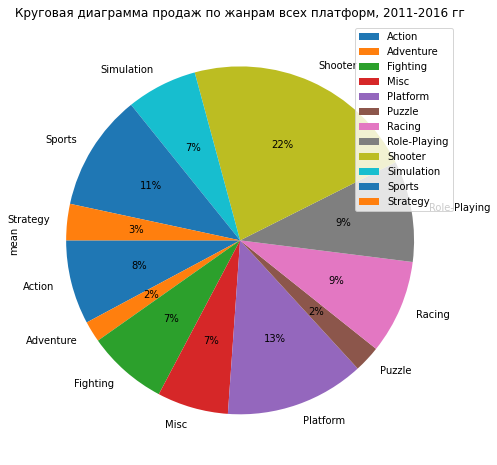

In [73]:
#Будем смотреть по медиане, так как данные со средним коррелируют
data5.groupby(['genre']).agg(['median'])\
     .plot(
         kind='pie', 
         y='sum_sales',
         autopct='%1.0f%%',
         figsize=(8,8),startangle=180)
plt.title('Круговая диаграмма продаж по жанрам всех платформ, 2011-2016 гг')
plt.show()

In [118]:
#Посмотрим картину продаж по жанрам ТОП-5 платформ
data_genre5_top5 = data5.query('platform == [ "X360", "PS3", "PS4", "XOne"]').pivot_table(index='genre', values='sum_sales', aggfunc=['sum','mean', 'median','count'])
data_genre5_top5.columns = ['sum_sales_mln','mean_sales_mln','median_sales_mln', 'count_sales_mln']
data_genre5_top5 = data_genre5_top5.reset_index().sort_values(by='median_sales_mln', ascending=False)
data_genre5_top5

,genre,sum_sales_mln,mean_sales_mln,median_sales_mln,count_sales_mln
8,Shooter,367.31,1.549831,0.570,237
10,Sports,200.66,0.815691,0.345,246
4,Platform,24.80,0.576744,0.260,43
2,Fighting,44.01,0.423173,0.245,104
0,Action,402.92,0.664884,0.230,606
6,Racing,57.48,0.508673,0.220,113
7,Role-Playing,101.74,0.620366,0.215,164
3,Misc,59.66,0.420141,0.135,142
9,Simulation,8.32,0.202927,0.120,41
11,Strategy,3.84,0.166957,0.090,23


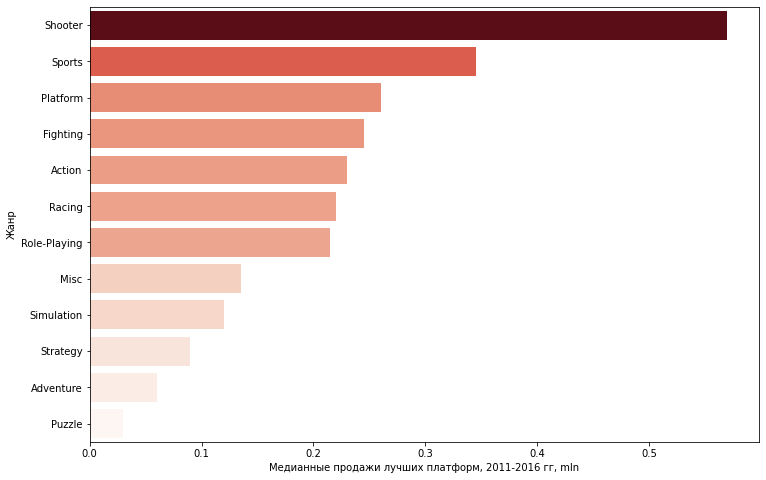

In [159]:
#result = data_genre5_top5.groupby(["genre"])['median_sales_mln'].aggregate(np.median).reset_index()
norm = plt.Normalize(data_genre5_top5["median_sales_mln"].values.min(), data_genre5_top5["median_sales_mln"].values.max())
colors = plt.cm.Reds(norm(data_genre5_top5["median_sales_mln"])) 

plt.figure(figsize=(12,8))
sns.barplot(y="genre", x="median_sales_mln", data=data_genre5_top5, palette=colors)
plt.xlabel('Медианные продажи лучших платформ, 2011-2016 гг, mln', fontsize=10)
plt.ylabel('Жанр', fontsize=10)
plt.yticks(rotation='horizontal')
plt.show()

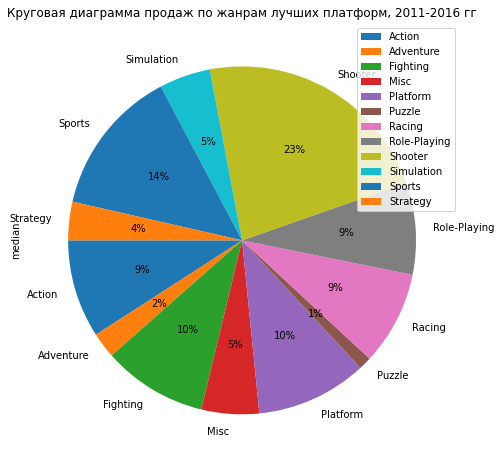

In [160]:
data5.query('platform == [ "X360", "PS3", "PS4", "XOne"]')\
     .groupby(['genre']).agg(['median'])\
     .plot(
         kind='pie', 
         y='sum_sales',
         autopct='%1.0f%%',
         figsize=(8,8),startangle=180)
plt.title('Круговая диаграмма продаж по жанрам лучших платформ, 2011-2016 гг')
plt.show()

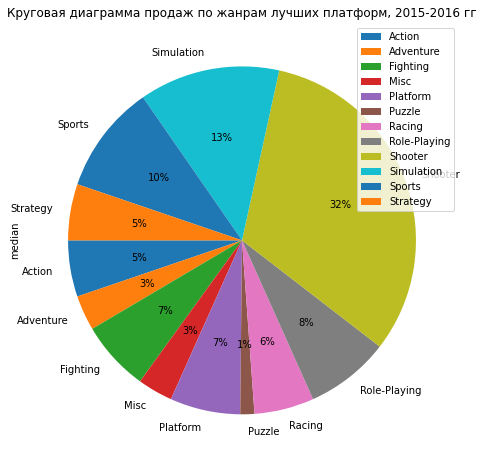

In [161]:
data16.query('platform == [ "X360", "PS3", "PS4", "XOne"]')\
     .groupby(['genre']).agg(['median'])\
     .plot(
         kind='pie', 
         y='sum_sales',
         autopct='%1.0f%%',
         figsize=(8,8),startangle=180)
plt.title('Круговая диаграмма продаж по жанрам лучших платформ, 2015-2016 гг')
plt.show()

**Выводы:**
Анализ проводила по медианным значениям (коррелируют со средним), чтобы избежать искажений из-за несистемных продаж.
*  Самыми прибыльными жанрами за период 2011-2016 гг. являются **Shooter** (22%) - идет в значительном отрыве от всех остальных жанров.
* Хорошо себя также показывают игры в жанрах - **Platform, Sports** (13% и 11% соответственно), **Role-Playing и Racing** чуть хуже, но тоже популярны - 9%.
*  Наименее прибыльным направлением в играх является **Adventure** и **Puzzle** - 2% (Разница с лидерами продаж более, чем в 10 раз.).
> Интересен тот факт, что если брать анализ по сумме продаж - лидирует **Action**, вероятно в лидирующих платформах этот жанр  популярен, также возможно именно в топовых платформахь регулярно выходили какие-то обновления и проводились акции, ткоторые вызывали всплеск продаж.
* На круговой диаграмме выделила из топ 5 лидеров, десь картина немного меняется:
 * Также с большим отрывом лидируют продажи в жанре **Shooter** (показатель немного выше - 23%), а это значит, что в принципе большей популярностью пользуются именно тот жанр. Затем идут с небольшим отрывом **Sports(14%), Platform(10%), Fighting(10%) Action(9%), Racing(9%), Role-Playing(9%)**. 
 * Доля **Puzzle** снизилась до 1%. Видимо в топовых играх либо нет таких жанров, либо они неинтересны совсем клиентам. В любом случае, видимо, эти направления в последние годы совсем потеряли популярность. 
 > А если взять период период 2015-2016 гг. можно увидеть явную тенденцию активного роста популярности **Shooter** - лидер по продажам 32%, очень выросла **Simulation** - 13%, затем уже идут **Sports** - 10% и **Role-Playing** - 10%, **Platform(7%), Fighting(7%)**. Доля **Puzzle** также на минимуме - 1%.
Вполне возможно, что снижение продаж по жанрам **Platform и Fighting** может быть вызвано тем, тем, что самые успешные платформы за последние 5 лет уже приблизились к концу своего "срока жизни". Необходимы дополнительные исследования, чтобы определенно назвать это снижение популярности - тенденцией. 

Таким образом можно сделать вывод, что точно наблюдается тенедеция **роста популярности такого жанра как Shooter** - за последнее время наблюдается большой рост продаж по всем срезам. И постоянное снижение продаж по жанру **Puzzle**.

## **Шаг 4. Составьте портрет пользователя каждого региона**
1. Определите для пользователя каждого региона (NA, EU, JP):
 * Самые популярные платформы (топ-5). 
 * Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### **1. Определите для пользователя каждого региона (NA, EU, JP):**
 * Самые популярные платформы (топ-5). 
 * Опишите различия в долях продаж.

In [163]:
#Определим топ-5 платформ по регионам
platform5=data5.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'], aggfunc='sum')\
     .reset_index()\
     .sort_values(by='sum_sales', ascending=False)
platform5.head(9)

,platform,eu_sales,jp_sales,na_sales,other_sales,sum_sales
4,PS3,163.10,49.39,168.26,64.82,445.57
10,X360,117.10,3.35,226.80,33.13,380.38
5,PS4,141.09,15.96,108.74,48.35,314.14
0,3DS,61.27,100.62,82.65,13.27,257.81
11,XOne,51.59,0.34,93.12,14.27,159.32
2,PC,56.70,0.00,29.88,11.10,97.68
8,Wii,29.60,8.97,48.56,7.89,95.02
9,WiiU,25.13,13.01,38.10,5.95,82.19
7,PSV,13.07,21.84,12.47,6.43,53.81


In [164]:
#посчитаем суммарные продажи по всем регионам
platform_sales5['sum_sales'] =  platform_sales5[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
#platform_sales5.sort_values(by='sum_sales', ascending=False).head(20)
platform_sales5.describe()

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,11.548103,4.235345,14.306207,3.601897,33.691552
std,14.313436,5.770291,18.627935,5.203417,38.640066
min,0.000000,0.000000,0.000000,0.000000,0.120000
25%,1.747500,0.057500,1.687500,0.425000,6.610000
50%,5.640000,2.290000,7.060000,1.470000,17.690000
75%,16.970000,5.700000,16.930000,4.267500,50.460000
max,56.240000,23.570000,86.750000,21.560000,156.780000


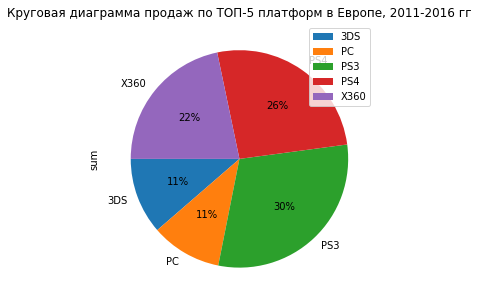

Общее количество продаж ТОП-5 платформ: 539.2600000000006 млн.


,platform,eu_sales,jp_sales,na_sales,other_sales,sum_sales
4,PS3,163.10,49.39,168.26,64.82,445.57
5,PS4,141.09,15.96,108.74,48.35,314.14
10,X360,117.10,3.35,226.80,33.13,380.38
0,3DS,61.27,100.62,82.65,13.27,257.81
2,PC,56.70,0.00,29.88,11.10,97.68


In [165]:
top5_platform_eu=platform5.sort_values(by='eu_sales', ascending=False).head()
top5_platform_eu.groupby(['platform']).agg(['sum'])\
  .plot( kind='pie', 
         y='eu_sales',
         autopct='%1.0f%%',
         figsize=(5,5),startangle=180)
plt.title('Круговая диаграмма продаж по ТОП-5 платформ в Европе, 2011-2016 гг')
plt.show()
print('Общее количество продаж ТОП-5 платформ:', top5_platform_eu['eu_sales'].sum(), 'млн.')
top5_platform_eu

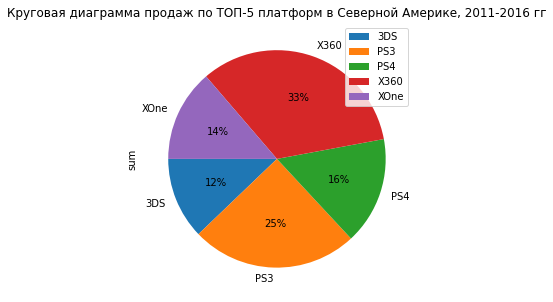

Общее количество продаж ТОП-5 платформ: 616.3300000000004 млн.


,platform,eu_sales,jp_sales,na_sales,other_sales,sum_sales
10,X360,117.10,3.35,226.80,33.13,380.38
4,PS3,163.10,49.39,168.26,64.82,445.57
5,PS4,141.09,15.96,108.74,48.35,314.14
11,XOne,51.59,0.34,93.12,14.27,159.32
0,3DS,61.27,100.62,82.65,13.27,257.81


In [166]:
top5_platform_na=platform5.sort_values(by='na_sales', ascending=False).head()
top5_platform_na.groupby(['platform']).agg(['sum'])\
  .plot( kind='pie', 
         y='na_sales',
         autopct='%1.0f%%',
         figsize=(5,5),startangle=180)
plt.title('Круговая диаграмма продаж по ТОП-5 платформ в Северной Америке, 2011-2016 гг')
plt.show()
print('Общее количество продаж ТОП-5 платформ:', top5_platform_eu['na_sales'].sum(), 'млн.')
top5_platform_na

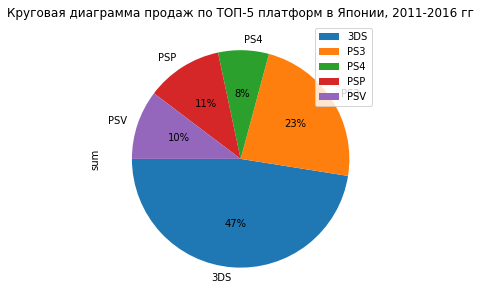

Общее количество продаж ТОП-5 платформ: 211.85000000000022 млн.


,platform,eu_sales,jp_sales,na_sales,other_sales,sum_sales
0,3DS,61.27,100.62,82.65,13.27,257.81
4,PS3,163.10,49.39,168.26,64.82,445.57
6,PSP,1.77,24.04,2.19,1.01,29.01
7,PSV,13.07,21.84,12.47,6.43,53.81
5,PS4,141.09,15.96,108.74,48.35,314.14


In [167]:
top5_platform_jp=platform5.sort_values(by='jp_sales', ascending=False).head()
top5_platform_jp.groupby(['platform']).agg(['sum'])\
  .plot( kind='pie', 
         y='jp_sales',
         autopct='%1.0f%%',
         figsize=(5,5),startangle=180)
plt.title('Круговая диаграмма продаж по ТОП-5 платформ в Японии, 2011-2016 гг')
plt.show()
print('Общее количество продаж ТОП-5 платформ:', top5_platform_jp['jp_sales'].sum(), 'млн.')
top5_platform_jp

Вывод:
Был проведен анализ продаж по регионам и получились следующие портреты пользователей:
1. **Пользователь из Европы**:
* В Европе лидерами продаж являются следующие платформы: Со значительным отрывом **PS3** (163 млн), **PS4** (141 млн), **X360** (117 млн), значительно отстают платформы - **3D** (61 млн), **`PC`** (57 млн).
* Общее количество продаж ТОП-5 платформ: 539.26 млн.
2. **Пользователь из  Северной Америки**:
* В Европе лидерами продаж являются следующие платформы: Со значительным отрывом **X360** (227 млн), **PS3** (168 млн), значительно отстают платформы - **PS4** (108 млн), **XOne** (93 млн), **3DS** (82 млн).
* Общее количество продаж ТОП-5 платформ: 616.33 млн.
Разительно отличаются предпочтения у пользователей из Японии.
3. **Пользователь из Японии**:
* В Европе лидерами продаж являются следующие платформы: самая популярная **3DS** (101 млн), затем уже со значительным отрывом идут платформы - **PS3** (49 млн), ,  значительно отстают платформы - **`PSP`** (24 млн), **`PSV`** (22 млн), **PS4** (16 млн).
* Общее количество продаж ТОП-5 платформ: 211.85 млн.

Вообще интересно, что предпочтения в выборе платформы у Европейцев и жителей Северной Америки схожи, а у Японцев очень отличаются - общими для всех являются платформы **PS3** и **PS4**, причем если у европейцев последняя - это лидер по популярности, то у японцев - наименее популярная. Но у всех пользователей во всех странах платформа **PS3** - в топе.
> Хочу заметить, что продажи больше всего в Северной Америке (616 млн), Европа чуть отстает(539 млн) , а Япония в значительном отрыве (211 млн). Скорее всего именно предпочтения первых и определяют основной рейтинг платформ по продажам. 

### **2. Самые популярные жанры (топ-5). Поясните разницу.Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Так как данные в 2016 году могут быт неполными по рейтингу, поэтому будем рассматривать период 2011-2015 гг

Ранее мы выделили ТОП-5 по общим результатам:
Action
Shooter
Role-Playing
Sports
Misc
Посмотрим как этот список меняется в зависимости от региона.

In [168]:
# проверим общую картину по жанрам в регионах.
genre5=data5.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales','sum_sales'], aggfunc='sum')\
     .reset_index()\
     .sort_values(by='sum_sales', ascending=False)
genre5

,genre,eu_sales,jp_sales,na_sales,sum_sales
0,Action,199.12,63.62,230.92,557.80
8,Shooter,148.02,11.92,194.43,402.91
7,Role-Playing,62.30,79.87,83.78,245.63
10,Sports,88.48,11.09,108.70,237.15
3,Misc,39.72,17.60,69.69,139.42
4,Platform,30.07,12.13,38.28,88.68
6,Racing,40.58,5.64,31.98,88.31
2,Fighting,16.24,12.38,31.63,66.90
9,Simulation,19.72,11.64,15.37,50.26
1,Adventure,13.96,12.07,14.76,45.04


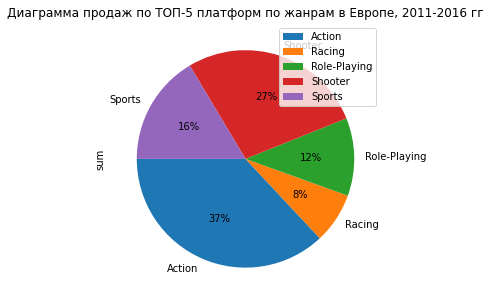

Общее количество продаж ТОП-5 по жанрам: 538.5000000000006 млн.


,genre,eu_sales,jp_sales,na_sales,sum_sales
0,Action,199.12,63.62,230.92,557.80
8,Shooter,148.02,11.92,194.43,402.91
10,Sports,88.48,11.09,108.70,237.15
7,Role-Playing,62.30,79.87,83.78,245.63
6,Racing,40.58,5.64,31.98,88.31


In [171]:
top5_genre_eu=genre5.sort_values(by='eu_sales', ascending=False).head()
top5_genre_eu.groupby(['genre']).agg(['sum'])\
  .plot( kind='pie', 
         y='eu_sales',
         autopct='%1.0f%%',
         figsize=(5,5),startangle=180)
plt.title('Диаграмма продаж по ТОП-5 платформ по жанрам в Европе, 2011-2016 гг')
plt.show()
print('Общее количество продаж ТОП-5 по жанрам:', top5_genre_eu['eu_sales'].sum(), 'млн.')
top5_genre_eu

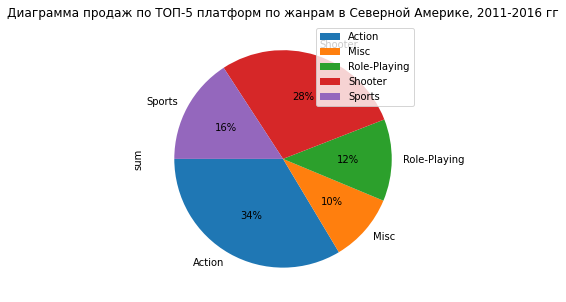

Общее количество продаж ТОП-5 по жанрам: 687.52 млн.


,genre,eu_sales,jp_sales,na_sales,sum_sales
0,Action,199.12,63.62,230.92,557.80
8,Shooter,148.02,11.92,194.43,402.91
10,Sports,88.48,11.09,108.70,237.15
7,Role-Playing,62.30,79.87,83.78,245.63
3,Misc,39.72,17.60,69.69,139.42


In [62]:
top5_genre_na=genre5.sort_values(by='na_sales', ascending=False).head()
top5_genre_na.groupby(['genre']).agg(['sum'])\
  .plot( kind='pie', 
         y='na_sales',
         autopct='%1.0f%%',
         figsize=(5,5),startangle=180)
plt.title('Диаграмма продаж по ТОП-5 платформ по жанрам в Северной Америке, 2011-2016 гг')
plt.show()
print('Общее количество продаж ТОП-5 по жанрам:', top5_genre_na['na_sales'].sum(), 'млн.')
top5_genre_na

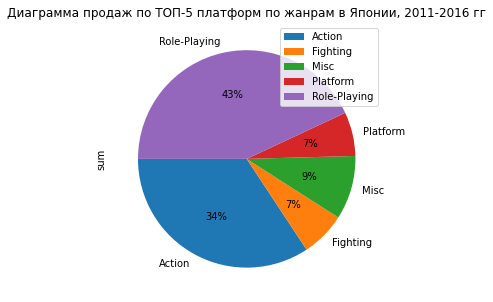

Общее количество продаж ТОП-5 по жанрам: 185.60 млн.


,genre,eu_sales,jp_sales,na_sales,sum_sales
7,Role-Playing,62.30,79.87,83.78,245.63
0,Action,199.12,63.62,230.92,557.80
3,Misc,39.72,17.60,69.69,139.42
2,Fighting,16.24,12.38,31.63,66.90
4,Platform,30.07,12.13,38.28,88.68


In [172]:
top5_genre_jp=genre5.sort_values(by='jp_sales', ascending=False).head()
top5_genre_jp.groupby(['genre']).agg(['sum'])\
  .plot( kind='pie', 
         y='jp_sales',
         autopct='%1.0f%%',
         figsize=(5,5),startangle=180)
plt.title('Диаграмма продаж по ТОП-5 платформ по жанрам в Японии, 2011-2016 гг')
plt.show()
print('Общее количество продаж ТОП-5 по жанрам:', format(top5_genre_jp['jp_sales'].sum(), ".2f"), 'млн.')
top5_genre_jp

**Вывод:**

Дополним наш портрет пользователя по жанрам:
1. **Пользователь из Европы**:
* В Европе градация по жанрам следующая: Самые популярные жанры **Action** (199 млн), **Shooter** (148 млн), затем со значительным отрывом идут **Sports** (89 млн), **Role-Playing** (62 млн), **`Racing`** (41 млн).
* Общее количество продаж ТОП-5 по жанрам: 538.5 млн.
2. **Пользователь из Северной Америки**:
* В Северной Америке градация по жанрам следующая: Самые популярные жанры **Action** (231 млн), **Shooter** (194 млн), затем со значительным отрывом идут **Sports** (109 млн), **Role-Playing** (84 млн), **`Misc`** (70 млн).
* Общее количество продаж ТОП-5 по жанрам: 687.5 млн.

Опять же наблюдается резкая разница в предпочтениях у Японцев.
3. **Пользователь из Японии**:
* В Японии градация по жанрам следующая: Самые популярные жанры **Role-Playing** (80 млн), **Action** (64 млн),  затем со значительным отрывом идутм **Misc** (18 млн), **`Fighting`** (12.4 млн), **`Platform`** (12.2 млн), .
* Общее количество продаж ТОП-5 по жанрам: 185.6 млн.

Общими по популярности у всех являются **Action** и **Role-Playing**. И если в Европе и Севарной Америки большой популярностью пользуется жанр **Shooter**, то в Японии он вообще не вошел в топ-5.

In [173]:
data5.query('platform == [ "X360", "PS3", "PS4", "XOne"]')\
     .pivot_table(index=['platform'], columns ='genre', values=['sum_sales'], aggfunc='sum')
#display(data5.groupby(['platform'])['genre'].unique())
#data5.groupby(['genre'])['platform'].unique()

sum_sales                                                   \
genre       Action Adventure Fighting   Misc Platform Puzzle Racing   
platform                                                              
PS3         159.59     12.43    20.77  14.13    11.74   0.04  18.07   
PS4          96.10      6.34     8.65   8.19     7.69   0.02  12.14   
X360        109.92      7.16    12.14  29.91     4.44    NaN  17.48   
XOne         37.31      2.68     2.45   7.43     0.93    NaN   9.79   

                                                          
genre    Role-Playing Shooter Simulation Sports Strategy  
platform                                                  
PS3             40.88  100.16       3.41  62.45     1.90  
PS4             28.99   88.56       1.23  55.61     0.62  
X360            21.32  118.26       2.99  55.86     0.90  
XOne            10.55   60.33       0.69  26.74     0.42

### **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [174]:
data5.loc[(data5['genre'] == 'Action')|(data5['genre'] =='Shooter')|(data5['genre'] =='Role-Playing')\
          |(data5['genre'] =='Sports')|(data5['genre'] =='Racing')]\
     .pivot_table(index=['genre'], columns='rating', values=['eu_sales'], aggfunc='sum')
#     .sort_values(by='eu_sales', ascending=False)

eu_sales                                   
rating              E   E10+   EC       M      T unknown
genre                                                   
Action          19.19  35.82  0.0   95.65  26.20   22.26
Racing          21.99   4.49  NaN    0.06   6.01    8.03
Role-Playing     1.24   1.45  NaN   31.24   9.03   19.34
Shooter          0.00   5.03  NaN  112.00  13.47   17.52
Sports          64.24   2.96  NaN     NaN   6.39   14.89

In [175]:
data5.loc[(data5['genre'] == 'Action')|(data5['genre'] =='Shooter')|(data5['genre'] =='Role-Playing')\
          |(data5['genre'] =='Sports')|(data5['genre'] =='Misc')]\
     .pivot_table(index=['genre'], columns='rating', values=['na_sales'], aggfunc='sum')

na_sales                                    
rating              E   E10+    EC       M      T unknown
genre                                                    
Action          15.38  47.83  0.42  106.73  33.84   26.72
Misc            11.81  32.24   NaN    0.80   8.11   16.73
Role-Playing     2.80   2.53   NaN   36.54  14.97   26.94
Shooter          0.02   7.20   NaN  148.00  18.87   20.34
Sports          85.30   9.73   NaN     NaN   8.58    5.09

In [176]:
data5.loc[(data5['genre'] == 'Action')|(data5['genre'] =='Role-Playing')\
          |(data5['genre'] =='Misc')|(data5['genre'] =='Fighting')|(data5['genre'] =='Platform')]\
     .pivot_table(index=['genre'], columns='rating', values=['jp_sales'], aggfunc='sum')

jp_sales                                 
rating              E  E10+   EC      M      T unknown
genre                                                 
Action           5.22  2.90  0.0  11.56   9.68   34.26
Fighting          NaN  0.17  NaN   0.57   5.03    6.61
Misc             3.08  1.27  NaN   0.20   1.21   11.84
Platform         9.83  1.56  NaN    NaN   0.03    0.71
Role-Playing     1.87  2.27  NaN   4.86  15.20   55.67

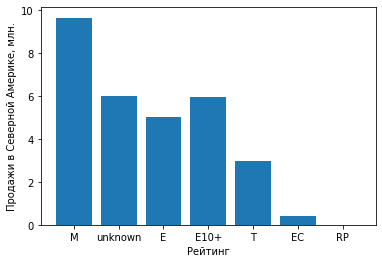

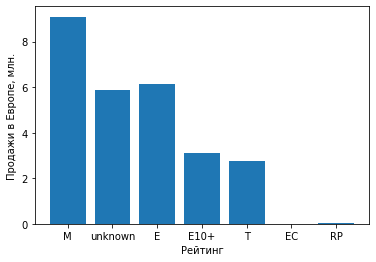

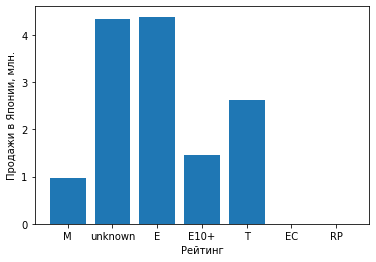

In [177]:
#Ограничим период 2011-2015
data5_filt=data5.loc[data5['year_of_release'] != 2016]
# проверим общую картину по жанрам в регионах.
data5_filt.pivot_table(index=['genre','rating'], values=['na_sales', 'eu_sales', 'jp_sales','sum_sales'], aggfunc='sum')\
#     .sort_values(by='sum_sales', ascending=False)
plt.bar(data5_filt['rating'], data5_filt['na_sales'])
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в Северной Америке, млн.')
plt.show()

plt.bar(data5_filt['rating'], data5_filt['eu_sales'])
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в Европе, млн.')
plt.show()

plt.bar(data5_filt['rating'], data5_filt['jp_sales'])
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в Японии, млн.')
plt.show()

In [178]:
#data5.loc[data5['platform']=='X360'].groupby(['critic_score',	'user_score',	'rating'])['sum_sales'].sum()

**Выводы:**
В результате анализа данных по выборке 2011-2016 гг получила следующие портреты пользователей каждого региона:
1. **Пользователь из Европы**:
 * В Европе лидерами продаж являются следующие платформы: Со значительным отрывом **PS3** (163 млн), **PS4** (141 млн), **X360** (117 млн), значительно отстают платформы - **3D** (61 млн), **`PC`** (57 млн).
 > Общее количество продаж ТОП-5 платформ: 539.26 млн.
 * В Европе градация по жанрам следующая: Самые популярные жанры **Action** (199 млн), **Shooter** (148 млн), затем со значительным отрывом идут **Sports** (89 млн), **Role-Playing** (62 млн), **`Racing`** (41 млн).
 > Общее количество продаж ТОП-5 по жанрам: 538.5 млн.
2. **Пользователь из  Северной Америки**:
 * В Северной Америке лидерами продаж являются следующие платформы: Со значительным отрывом **X360** (227 млн), **PS3** (168 млн), значительно отстают платформы - **PS4** (108 млн), **XOne** (93 млн), **3DS** (82 млн).
 > Общее количество продаж ТОП-5 платформ: 616.33 млн.
 * В Северной Америке градация по жанрам следующая: Самые популярные жанры **Action** (231 млн), **Shooter** (194 млн), затем со значительным отрывом идут **Sports** (109 млн), **Role-Playing** (84 млн), **`Misc`** (70 млн).
 >Общее количество продаж ТОП-5 по жанрам: 687.5 млн.
3. **Пользователь из Японии**:
 * В Японии лидерами продаж являются следующие платформы: самая популярная **3DS** (101 млн), затем уже со значительным отрывом идут платформы - **PS3** (49 млн), ,  значительно отстают платформы - **`PSP`** (24 млн), **`PSV`** (22 млн), **PS4** (16 млн).
 > Общее количество продаж ТОП-5 платформ: 211.85 млн.
3. **Пользователь из Японии**:
 * В Японии градация по жанрам следующая: Самые популярные жанры **Role-Playing** (80 млн), **Action** (64 млн),  затем со значительным отрывом идутм **`Misc`** (18 млн), **`Fighting`** (12.4 млн), **`Platform`** (12.2 млн), .
 > Общее количество продаж ТОП-5 по жанрам: 185.6 млн.

* Предпочтения у Японцев разительно отличаются, как по жанрам, так и по платформам по сравнению с европейцами и жителями Северной Америки:
 * По латформам общими для всех являются платформы **PS3** и **PS4**, причем если у европейцев последняя - это лидер по популярности, то у японцев - наименее популярная. Но у всех пользователей во всех странах платформа **PS3** - в топе.
 * Если говорить о жанрах, то общими по популярности у всех являются **Action** и **Role-Playing**. И если в Европе и Севарной Америки большой популярностью пользуется жанр **Shooter**, то в Японии он вообще не вошел в топ-5.
> Хочу заметить, что продажи, как по платформам так и по жанрам больше всего в Северной Америке, Европа чуть отстает, а Япония в значительном отрыве - более, чем в 2 раза относительно каждого. Скорее всего именно предпочтения первых и отражают основной рейтинг и платформ, и жанров.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**
Как видим, что согласно рейтинга ESRB:
- в **Европе и Северной Америке** больше всего покупают игры из **группы М** («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет), 
- в то время, как в **Японии** более популярны игры из **подгруппы Е** («Для всех»: возраст 6+; такие игры могут понравиться и взрослым) Также в Японии на втором месте по популярности игры из неопределенной подгруппы.
- и во всех регионах популярны игры E10+.
Такие результаты явно связаны с предпочтениями игр в регионах - к примеру,игры в жанре `Shooter`, которые очень популярны в Европе и Севверной Америке, явно не подпадают под категорию Е, так как связаны с насилием.
А возможно в Японии более жесткие ограничения по играм категории M (это предположение надо проверять).

## **Шаг 5. Проверьте гипотезы**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
3. Задайте самостоятельно пороговое значение alpha.
4. Поясните:
 * Как вы сформулировали нулевую и альтернативную гипотезы;
 * Какой критерий применили для проверки гипотез и почему.

1. **Проверяем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Берем выборку по 2011-2016 гг, удаляем для анализа пропущенные значения.

In [179]:
data5.loc[(data5['platform']=='PC')&(~data['user_score'].isna())].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_f,sum_sales
14474,Transformers: Devastation,PC,2015,Action,0.00,0.03,0.0,0.00,74.0,7.0,T,74,0.03
11990,Operation Flashpoint: Red River,PC,2011,Shooter,0.01,0.04,0.0,0.01,67.0,4.0,M,67,0.06
12132,Goodbye Deponia,PC,2013,Adventure,0.00,0.06,0.0,0.00,80.0,7.0,unknown,80,0.06


In [180]:
#djpmvtv lfnfahtqvs pf gthbjl c 2011-2016, удалим пропуски
data5.loc[(data5['platform']=='PC')&(~data['user_score'].isna())].sample(3)
data5.loc[(data5['platform']=='XOne')&(~data['user_score'].isna())].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_f,sum_sales
847,Battlefield 4,XOne,2013,Shooter,1.25,0.58,0.0,0.19,81.0,6.0,M,81,2.02
14594,Valentino Rossi: The Game,XOne,2016,Racing,0.01,0.02,0.0,0.00,74.0,8.0,E,74,0.03
6492,Project CARS,XOne,2015,Racing,0.11,0.13,0.0,0.02,81.0,5.0,E,81,0.26


In [203]:
from scipy import stats as st
data_XbOne = data5.loc[(data5['platform']=='XOne')&(~data5['user_score'].isna())]
data_PC = data5.loc[(data5['platform']=='PC')&(~data5['user_score'].isna())]

XbOne_us = data_XbOne['user_score']
PC_us = data_PC['user_score']
#Применим гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
#причем считаем, что выборки взяты из разных по параметрам совокупностей
results = st.ttest_ind(XbOne_us, PC_us, equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.35987294572150186
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Проверили **нулевую гипотезу** - **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

Входящие данные:
* Взяла пороговое значение `alpha=5%`;
* Предположила, что параметр дисперсии выборок `equal_var = False` —  дисперсии генеральных совокупностей имеют различные значения.
* **Альтернативная гипотеза** - **средние пользовательские рейтинги платформ Xbox One и PC разные**.
* Выборка по **2011-2016 гг.**

Для решения задачи применила метод Стьюдента - гипотеза о равенстве средних двух генеральных совокупностей с предположительно нормальным распределением совокупностей (как указывалось в теории - этот метод универсален и длябольших совокупностей).

До начала проверки удалила пропущенные значения в выборке.

В результате видно, что **Нулевая гипотеза с большой долей вероятности верна**, 
Уровень значимости 0,36, что означает, что наши вероятность попадания значений взону распределения отклонения от среднего значения велика. 
> Проверяла гипотезу `на выборке 2015-2016` - итоговый результат тот же, только чуть меньше доля вероятности.



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

2. **Проверяем следующую гипотезу**: 

H0 = "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые"
H1 = "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

In [198]:
data16.loc[(data16['genre']=='Action')&(~data16['user_score'].isna())].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_f,sum_sales
15512,Dynasty Warriors 8: Empires,PSV,2015,Action,0.00,0.00,0.02,0.00,70,7,T,70,0.02
11059,Pokemon Rumble World,3DS,2015,Action,0.00,0.01,0.08,0.00,58,6,E10+,58,0.09
6322,Rory McIlroy PGA Tour,XOne,2015,Action,0.16,0.09,0.00,0.02,60,4,E,60,0.27


In [199]:
data16.loc[(data16['genre']=='Sports')&(~data16['user_score'].isna())].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_f,sum_sales
7575,FIFA 16,PC,2015,Sports,0.06,0.13,0.00,0.01,81,4,E,81,0.20
4387,Mario Tennis Ultra Smash,WiiU,2015,Sports,0.13,0.15,0.14,0.02,58,5,E,58,0.44
2780,NBA 2K16,PS3,2015,Sports,0.45,0.12,0.03,0.13,<NA>,4,E,71,0.73


In [204]:
from scipy import stats as st
data_action = data5.loc[(data5['genre']=='Action')&(~data5['user_score'].isna())]
data_sports = data5.loc[(data5['genre']=='Sports')&(~data5['user_score'].isna())]

action_us = data_action['user_score']
sports_us = data_sports['user_score']
#Применим гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
#причем считаем, что выборки взяты из разных по параметрам совокупностей
results = st.ttest_ind(action_us, sports_us, equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 3.0662818404390795e-18
Отвергаем нулевую гипотезу


**Вывод:**

Проверили следующую **нулевую гипотезу**:
H0 = "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые"
**альтернативная гипотеза**:
H1 = "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

Входящие данные:
* Взяла пороговое значение `alpha=5%`;
* Предположила, что параметр дисперсии выборок `equal_var = False` —  —  дисперсии генеральных совокупностей имеют различные значения.
* Выборка по **2011-2016 гг.**

Для решения задачи применила метод Стьюдента - гипотеза о равенстве средних двух генеральных совокупностей с предположительно нормальным распределением совокупностей (как указывалось в теории - этот метод универсален и длябольших совокупностей).

На основании имеющихся данных вычислили, что уровень значимости =`3,0*10^(-18)`, а значит есть основания отвергнуть нулевую гипотезу в пользу альтернативной, а именно: **"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."**

> Проверяла гипотезу `на выборке 2015-2016` - итоговый результат тот же, очень близкий по значениям.


## **Шаг 6. Общий вывод**
**Входяшие данные:**
Предоставлены данные до 2016 года.
> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Мы планируем кампанию на 2017-й, **задача следующая:**
* Отработать принцип работы с данными. 
> Причем неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
* Выявить определяющие успешность игры закономерности Для дальнейшей ставки на потенциально популярный продукт и спланировать рекламные кампании.

**Итак, что было сделано:**
* В начале проверила структуру данных и их наполнение;
 * Выявила и удалила пропуски, где это возможно(`'genre' и 'name'`), Определила возможные причины пропусков(в промежуточных выводах) 
 * Оставила данные только в `critic_score и user_score` - там очень большое количество пропусков, если бы их удалила много данных было потеряно, а, значит, данные могли бы быть искажены.
>В столбце `'user_score'` встречается аббревиатура 'tbd', что расшифровывается "To Be Determined" - "статус будет определен", решила заменить эти данные на Nan для дальнейшего более удосного исследования.
* Подсчитала суммарные продажи во всех регионах.

* Проанализировала данные по платформам относительно продаж: 
 * При исследовании всего периода продаж было выявлено, что за все время самыми прибильными оказались **PS2 ,X360, PS3, Wii, DS, PS**	- они идут с явным отрывом от остальных. 
 * но было замечено, что платформы со временем утрачивают свою популярность - **время жизни в среднем 10 лет**, **пик популярности** приходится, как правило **через 5 лет** после появления. Поэтому некоторые успешные прлатформы к 2015-2016 гг совсем прекратили свои продажи.
 * в итоге для исследования был выбран период **2011-2016 гг**, куда попали 2 платформы из ТОП-6 всего датасета (**X360 и PS3**) как раз их последние 5 лет "жизни", хорошо продаваемые молодые платформы 2015-2016 года: **PS4, XOne и 3DS**(но последняя значительно отстает от лидеров). Поэтому дополнительным периодом для исследования взяла 2015-2016, для определения более свежих тенденций. В принципе имеет смысл исследовать, как пары - **"PS4", "XOne"** и **"X360"** и **"PS3"** так как они соизмеримы по времени жизни. 
Именно эти платформы в этом периоде будем рассматривать, как **перспективные**.
 * В итоге лидеры по доходу: **"X360"** и **"PS3"** имели максимальные продажи ** 16,3 млн и 21 млн**, медианные - **0.27 млн и 0.21 млн** соответственно.
 * Если смотреть платформы **"PS4"** и **"XOne"** в лидерах по доходу: максимальные продажи **14,6 млн и 7.4 млн**, медианные - **0.20 млн и 0.22 млн** соответственно.
 * У платформ **`X360, PS3 и 3DS`** - в выбранном периоде наблюдается тенеденция к снижению продаж, только в **2013** году был небольшой подъем у **`PS3 и 3DS`**, возможно в это время было выпущено какое-то обновление либо проведена другая акция, котроая вызвала небольшой всплеск популярности. 
 * У платформ **`PS4, XOne`** ситуация совсем другая - из таблиц и графика видно, что они были выпущены в **2013** году, и до **2015** года наблюдался их стремительный рост, но после **2015** года популярность пошла на спад.
> Интересен тот факт, что время жизни данных платформ намного ниже и судя по тенденции не дольше 4х лет. 
* Проведены исследования данных с помощью диаграммы размаха:
 * **из диаграммы размаха также видно, что лучшие продажи наблюдается как раз у выбранных нами платформ: `PS4,  X360`, `PS4`и `XOne`.**
 * у всех платформ есть редкие выбросы, как например у `PS4,  X360` в 15 млн. Больше всего несистемных продаж наблюдается именно в `PS4`и `X360` - вероятно там выходили какие-то новинки или обновления, котрые хорошо продавались.
 * `"PS3", "X360" и "XOne"` - имеют лучшие результаты по 2 квартилю, выше 0.2 млн. По остальным платформам - доход по медиане не превышает 0.2 млн.
>Вообще "X360" (медиана 0.27 млн) - лучше всего себя ведет. Один из самых успешных проектов за этот период на мой взгляд.
* Была подсчитана корреляция Пирсона для зависимости продаж от оценок критиков и отзывов пользователей, которая выявила:
  * среднюю прямую зависимость продаж от оценок критиков - **0.39**;
  * практически отсутствие зависимости уровня продаж от отзывов пользователей **0.03**.
* Также провела сравснение поведение продаж выбранных ранее платформ нашей  с другими, попашими в выбранный период. Для сравнения выбрала наиболее успешную платформу**WiiU**, не попавшую в нашу выборку внашем временном периоде. Корреляция Пирсона показала:
  * среднюю прямую зависимость продаж от оценок критиков - 0.35;
  * И что интересно, довольно сильную прямую зависимость уровня продаж от отзывов пользователей 0.40. 
>В этом наблюдается значительное различие с результатами от платформы X360. Можно сделать предположение, что в данном случае отсутствие зависимости от отзывов пользователей может быть одной из причин, более успешных продаж у X360 (но это надо проверять).
* Проведено исследование датасета по жанрам за период 2011-2016 гг (и 2015-2016 гг дополнительно):
* Было выявлено, что самым прибыльным и перспективным жанром является **Shooter**, причем тенденция роста наблюдается постоянно. * Наблюдается тенденция затухания интереса пользователей по жанру **Puzzle** - изначально был 2%, снизилось до 1%.
* В Качестве наиболее популярных жанров можно выделить: **Shooter(23%)** с большим отрывом, затем **Sports(14%), Platform(10%), Fighting(10%) Action(9%), Racing(9%), Role-Playing(9%)**.
> Интересен тот факт, что если брать анализ по сумме продаж - лидирует **Action**, вероятно в лидирующих платформах этот жанр  популярен, также возможно именно в топовых платформахь регулярно выходили какие-то обновления и проводились акции, ткоторые вызывали всплеск продаж.
* Если говорить о периоде 2015-2016 гг. можно увидеть явную тенденцию активного роста популярности **Shooter** - лидер по продажам 32%, очень выросла **Simulation** - 13%, затем уже идут **Sports** - 10% и **Role-Playing** - 10%, **Platform(7%), Fighting(7%)**. Доля **Puzzle** также на минимуме - 1%.
> Вполне возможно, что снижение продаж по жанрам **Platform и Fighting** может быть вызвано тем, тем, что самые успешные платформы за последние 5 лет уже приблизились к концу своего "срока жизни". Необходимы дополнительные исследования, чтобы определенно назвать это снижени популярности тенденцией. 
* Также были сформированы портреты пользователей по регионам (Япония, Северная Америка, Европа) по выборке 2011-2016 гг:
 1. **Пользователь из Европы**:
 * В Европе лидерами продаж являются следующие платформы: Со значительным отрывом **PS3** (163 млн), **PS4** (141 млн), **X360** (117 млн), значительно отстают платформы - **3D** (61 млн), **`PC`** (57 млн).
 * В Европе градация по жанрам следующая: Самые популярные жанры **Action** (199 млн), **Shooter** (148 млн), затем со значительным отрывом идут **Sports** (89 млн), **Role-Playing** (62 млн), **`Racing`** (41 млн).
 > Общее количество продаж ТОП-5 платформ: 539.26 млн.
 > Общее количество продаж ТОП-5 по жанрам: 538.5 млн.
 2. **Пользователь из  Северной Америки**:
 * В Северной Америке лидерами продаж являются следующие платформы: 
 Со значительным отрывом **X360** (227 млн), **PS3** (168 млн), значительно отстают платформы - **PS4** (108 млн), **XOne** (93 млн), **3DS** (82 млн).
 * В Северной Америке градация по жанрам следующая: 
 Самые популярные жанры **Action** (231 млн), **Shooter** (194 млн), затем со значительным отрывом идут **Sports** (109 млн), **Role-Playing** (84 млн), **`Misc`** (70 млн).
 > Общее количество продаж ТОП-5 платформ: 616.33 млн.
 > Общее количество продаж ТОП-5 по жанрам: 687.5 млн.
 3. **Пользователь из Японии**:
 * В Японии лидерами продаж являются следующие платформы: самая популярная **3DS** (101 млн), затем уже со значительным отрывом идут платформы - **PS3** (49 млн), ,  значительно отстают платформы - **`PSP`** (24 млн), **`PSV`** (22 млн), **PS4** (16 млн).
 * В Японии градация по жанрам следующая: Самые популярные жанры **Role-Playing** (80 млн), **Action** (64 млн),  затем со значительным отрывом идутм **`Misc`** (18 млн), **`Fighting`** (12.4 млн), **`Platform`** (12.2 млн), .
 > Общее количество продаж ТОП-5 платформ: 211.85 млн.
 > Общее количество продаж ТОП-5 по жанрам: 185.6 млн.
 * Следует отметить, что предпочтения у Японцев разительно отличаются, как по жанрам, так и по платформам по сравнению с европейцами и жителями Северной Америки:
   * По платформам общими для всех являются платформы **PS3** и **PS4**, причем если у европейцев последняя - это лидер по популярности, то у японцев - наименее популярная. Но у всех пользователей во всех странах платформа **PS3** - в топе.
   * Если говорить о жанрах, то общими по популярности у всех являются **Action** и **Role-Playing**. И если в Европе и Севарной Америки большой популярностью пользуется жанр **Shooter**, то в Японии он вообще не вошел в топ-5.

 > Хочу заметить, самые большие продажи по платформам и по жанрам в Северной Америке, а Япония в значительном отрыве - более, чем в 2 раза. Вероятно, именно предпочтения первых и определяют в итоге основной рейтинг и платформ, и жанров.
* Был также определен рейтинг ESRB по регионам
 - в **Европе и Северной Америке** больше всего покупают игры из **группы М** (17+), 
 - в то время, как в **Японии** более популярны игры из **подгруппы Е**(6+).
- и во всех регионах популярны игры E10+.
> Такие результаты явно связаны с предпочтениями игр в регионах - к примеру,игры в жанре `Shooter`, которые очень популярны в Европе и Севверной Америке, явно не подпадают под категорию Е, так как связаны с насилием.
А возможно в Японии более жесткие ограничения по играм категории M (это предположение надо проверять).

* Также были проверены 2 гипотезы:
 1. **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**;
(Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные).
 > Результат:**Нулевая гипотеза с большой долей вероятности верна**, 
Уровень значимости `0,36`, что означает, что наши вероятность попадания значений взону распределения отклонения от среднего значения велика. 
 2. **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**.
(**Нулевая гипотеза (H0)** - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые". **Альтернативная гипотеза**: H1 = "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.")
 > Результат: уровень значимости =`3,0*10^(-18)`, а значит есть основания отвергнуть нулевую гипотезу в пользу альтернативной: **"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."**

Для решения задач применяла метод Стьюдента - гипотеза о равенстве средних двух генеральных совокупностей с предположительно нормальным распределением совокупностей (как указывалось в теории - этот метод универсален и длябольших совокупностей).
 > В обоих случаях брала: 
 * пороговое значение `alpha=5%`;
 * параметр дисперсии выборок `equal_var = False`
 * Выборка по **2011-2016 гг.** (дополнительно проверяла по выборке 2015-2016гг)





<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Отличные подробные выводы.

<blockquote>

**Общий вывод по проекту**

Спасибо за твой проект! Ты приложила много усилий, чтобы довести его до конца, ты большой молодец! Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях.

**Что понравилось:**
* Аккуратная работа с хорошим оформлением, подробным анализом и выводами
* На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
* Качественная разнообразная визуализация

**Что нужно исправить**
* Выбрать прибыльные жанры по корректной метрике
* Добавить анализ влияния оценок критиков и пользователей на продажи для еще 2 платформ.
* Исправить проведение второго стат. теста

   
Если есть вопросы, я готов на них ответить.
    
Для будущего развития в плане визуализации советую обратить внимание на этот гайд по seaborn, библиотеке для визуализаци - примеры кода и графиков на русском
https://nbviewer.org/urls/mipt-stats.gitlab.io/courses/python/09_seaborn.ipynb
    
**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>

<div class="alert alert-info"> <b> Большое вам спасибо за ваши советы и ссылки - буду изучать и развиваться дальше :) </b>

<blockquote>

**Общий вывод по проекту-2**

Проект принят=)

**Успехов в дальнейшем обучении, у тебя всё получится!**